In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
# Libraries
import numpy as np 
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py

from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import ExtraTreeClassifier, DecisionTreeClassifier
# ANN

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a custom color palette with three colors
my_palette = sns.color_palette(['#377eb8', '#ff7f00', '#4daf4a'])



In [ ]:
# Reading the dataset
dataset = pd.read_csv('/content/smoke_detection.csv',index_col = False)
data = dataset.copy()


#Data accessing

In [ ]:
# Displaying 5 random samples from the dataset first 5 data
data.sample(5)

column_a         utc  temperature_c  humidity  tvoc_ppb  eco2_ppm  \
25900     25900  1654762249         12.980     56.56         9       400   
10120     10120  1654743451         -2.116     50.79       871       714   
22182     22182  1654755513        -15.408     52.85      1373       412   
36383     36383  1654772732         24.370     52.76      1065       634   
22065     22065  1654755396        -13.879     53.22      1377       412   

       raw_h2  raw_ethanol  pressure_hpa  pm1_0  pm2_5  nc0_5  nc1_0  nc2_5  \
25900   12998        19920       939.773   0.18   0.18   1.21  0.188  0.004   
10120   12773        19512       939.110   2.37   2.46  16.30  2.542  0.057   
22182   12958        19382       938.699   1.84   1.91  12.66  1.974  0.045   
36383   12802        19461       939.111   2.46   2.56  16.94  2.642  0.060   
22065   12960        19381       938.718   1.64   1.71  11.32  1.765  0.040   

         cnt  fire_alarm  
25900    906           0  
10120  10120           1  
22182  22182           1  
36383  11389           1  
22065  22065           1

In [ ]:
data.head()

column_a         utc  temperature_c  humidity  tvoc_ppb  eco2_ppm  raw_h2  \
0         0  1654733331         20.000     57.36         0       400   12306   
1         1  1654733332         20.015     56.67         0       400   12345   
2         2  1654733333         20.029     55.96         0       400   12374   
3         3  1654733334         20.044     55.28         0       400   12390   
4         4  1654733335         20.059     54.69         0       400   12403   

   raw_ethanol  pressure_hpa  pm1_0  pm2_5  nc0_5  nc1_0  nc2_5  cnt  \
0        18520       939.735    0.0    0.0    0.0    0.0    0.0    0   
1        18651       939.744    0.0    0.0    0.0    0.0    0.0    1   
2        18764       939.738    0.0    0.0    0.0    0.0    0.0    2   
3        18849       939.736    0.0    0.0    0.0    0.0    0.0    3   
4        18921       939.744    0.0    0.0    0.0    0.0    0.0    4   

   fire_alarm  
0           0  
1           0  
2           0  
3           0  
4           0

In [ ]:
data.tail()

utc  temperature_c  humidity  tvoc_ppb  eco2_ppm  raw_h2  \
62625  1655130047         18.438     15.79       625       400   13723   
62626  1655130048         18.653     15.87       612       400   13731   
62627  1655130049         18.867     15.84       627       400   13725   
62628  1655130050         19.083     16.04       638       400   13712   
62629  1655130051         19.299     16.52       643       400   13696   

       raw_ethanol  pressure_hpa  pm1_0  pm2_5  nc0_5  nc1_0  nc2_5   cnt  \
62625        20569       936.670   0.63   0.65   4.32  0.673  0.015  5739   
62626        20588       936.678   0.61   0.63   4.18  0.652  0.015  5740   
62627        20582       936.687   0.57   0.60   3.95  0.617  0.014  5741   
62628        20566       936.680   0.57   0.59   3.92  0.611  0.014  5742   
62629        20543       936.676   0.57   0.59   3.90  0.607  0.014  5743   

       fire_alarm  Smoke  
62625           0      0  
62626           0      0  
62627           0      0  
62628           0      0  
62629           0      0

In [ ]:
data.index

RangeIndex(start=0, stop=62630, step=1)

In [ ]:
data.shape

(62630, 16)

In [ ]:
data.columns

Index(['utc', 'temperature_c', 'humidity', 'tvoc_ppb', 'eco2_ppm', 'raw_h2',
       'raw_ethanol', 'pressure_hpa', 'pm1_0', 'pm2_5', 'nc0_5', 'nc1_0',
       'nc2_5', 'cnt', 'fire_alarm'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   column_a       62630 non-null  int64  
 1   utc            62630 non-null  int64  
 2   temperature_c  62630 non-null  float64
 3   humidity       62630 non-null  float64
 4   tvoc_ppb       62630 non-null  int64  
 5   eco2_ppm       62630 non-null  int64  
 6   raw_h2         62630 non-null  int64  
 7   raw_ethanol    62630 non-null  int64  
 8   pressure_hpa   62630 non-null  float64
 9   pm1_0          62630 non-null  float64
 10  pm2_5          62630 non-null  float64
 11  nc0_5          62630 non-null  float64
 12  nc1_0          62630 non-null  float64
 13  nc2_5          62630 non-null  float64
 14  cnt            62630 non-null  int64  
 15  fire_alarm     62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [ ]:
data.isna().sum()

column_a         0
utc              0
temperature_c    0
humidity         0
tvoc_ppb         0
eco2_ppm         0
raw_h2           0
raw_ethanol      0
pressure_hpa     0
pm1_0            0
pm2_5            0
nc0_5            0
nc1_0            0
nc2_5            0
cnt              0
fire_alarm       0
dtype: int64

In [ ]:
data = data.drop(['column_a'], axis =1)


In [ ]:
for col in data.columns:
    print('{} : {}'.format(col, data[col].unique()))

utc : [1654733331 1654733332 1654733333 ... 1655130049 1655130050 1655130051]
temperature_c : [20.    20.015 20.029 ... 15.714 16.333 16.957]
humidity : [57.36 56.67 55.96 ... 16.59 15.99 15.84]
tvoc_ppb : [  0  30  36 ... 513 517 643]
eco2_ppm : [ 400  403  406 ... 1365 1013  948]
raw_h2 : [12306 12345 12374 ... 13727 13718 13731]
raw_ethanol : [18520 18651 18764 ... 20413 20468 20482]
pressure_hpa : [939.735 939.744 939.738 ... 936.635 936.642 936.659]
pm1_0 : [0.   0.9  0.89 ... 4.98 4.57 3.62]
pm2_5 : [0.   3.78 3.71 ... 5.17 4.04 3.76]
nc0_5 : [ 0.    0.14  0.13 ... 26.73 24.89 19.27]
nc1_0 : [0.    4.369 4.289 ... 3.881 0.641 0.731]
nc2_5 : [0.    2.78  2.73  ... 0.202 0.16  0.121]
cnt : [    0     1     2 ... 24991 24992 24993]
fire_alarm : [0 1]


In [ ]:
data.mean()

utc              1.654792e+09
temperature_c    1.597042e+01
humidity         4.853950e+01
tvoc_ppb         1.942058e+03
eco2_ppm         6.700210e+02
raw_h2           1.294245e+04
raw_ethanol      1.975426e+04
pressure_hpa     9.386276e+02
pm1_0            1.005943e+02
pm2_5            1.844678e+02
nc0_5            4.914636e+02
nc1_0            2.035865e+02
nc2_5            8.004904e+01
cnt              1.051139e+04
fire_alarm       7.146256e-01
Smoke            2.334345e-02
dtype: float64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data[20:30]

utc  temperature_c  humidity  tvoc_ppb  eco2_ppm  raw_h2  \
20  1654733351         20.291     50.15         0       400   12491   
21  1654733352         20.305     50.02         0       400   12487   
22  1654733353         20.320     49.96         0       400   12492   
23  1654733354         20.334     49.83         0       415   12495   
24  1654733355         20.348     49.76         0       400   12498   
25  1654733356         20.363     49.65         0       401   12499   
26  1654733357         20.377     49.58         0       404   12503   
27  1654733358         20.391     49.37        30       445   12478   
28  1654733359         20.406     49.58        36       455   12472   
29  1654733360         20.420     50.11        20       443   12471   

    raw_ethanol  pressure_hpa  pm1_0  pm2_5  nc0_5  nc1_0  nc2_5  cnt  \
20        19456       939.729   0.38   1.60   0.00  1.855  1.180   20   
21        19470       939.741   0.33   1.39   0.00  1.610  1.024   21   
22        19489       939.756   0.31   1.30   0.00  1.497  0.953   22   
23        19489       939.764   0.27   1.12   0.00  1.291  0.821   23   
24        19503       939.770   0.25   1.04   0.00  1.197  0.762   24   
25        19516       939.774   0.21   0.89   0.00  1.026  0.653   25   
26        19525       939.771   0.20   0.82   0.00  0.949  0.604   26   
27        19500       939.771   0.17   0.58   0.14  0.665  0.398   27   
28        19487       939.770   0.16   0.56   0.13  0.644  0.385   28   
29        19493       939.775   0.15   0.52   0.12  0.595  0.356   29   

    fire_alarm  Smoke  
20           0      0  
21           0      0  
22           0      0  
23           0      0  
24           0      0  
25           0      0  
26           0      0  
27           0      0  
28           0      0  
29           0      0

In [ ]:
data.describe().T

count          mean            std           min  \
utc            62630.0  1.654792e+09  110002.488078  1.654712e+09   
temperature_c  62630.0  1.597042e+01      14.359576 -2.201000e+01   
humidity       62630.0  4.853950e+01       8.865367  1.074000e+01   
tvoc_ppb       62630.0  1.942058e+03    7811.589055  0.000000e+00   
eco2_ppm       62630.0  6.700210e+02    1905.885439  4.000000e+02   
raw_h2         62630.0  1.294245e+04     272.464305  1.066800e+04   
raw_ethanol    62630.0  1.975426e+04     609.513156  1.531700e+04   
pressure_hpa   62630.0  9.386276e+02       1.331344  9.308520e+02   
pm1_0          62630.0  1.005943e+02     922.524245  0.000000e+00   
pm2_5          62630.0  1.844678e+02    1976.305615  0.000000e+00   
nc0_5          62630.0  4.914636e+02    4265.661251  0.000000e+00   
nc1_0          62630.0  2.035865e+02    2214.738556  0.000000e+00   
nc2_5          62630.0  8.004904e+01    1083.383189  0.000000e+00   
cnt            62630.0  1.051139e+04    7597.870997  0.000000e+00   
fire_alarm     62630.0  7.146256e-01       0.451596  0.000000e+00   
temp_pos       62630.0  1.760243e+01      11.429002  0.000000e+00   
temp_neg       62630.0 -1.632008e+00       4.256735 -2.201000e+01   

                        25%           50%           75%           max  
utc            1.654743e+09  1.654762e+09  1.654778e+09  1.655130e+09  
temperature_c  1.099425e+01  2.013000e+01  2.540950e+01  5.993000e+01  
humidity       4.753000e+01  5.015000e+01  5.324000e+01  7.520000e+01  
tvoc_ppb       1.300000e+02  9.810000e+02  1.189000e+03  6.000000e+04  
eco2_ppm       4.000000e+02  4.000000e+02  4.380000e+02  6.000000e+04  
raw_h2         1.283000e+04  1.292400e+04  1.310900e+04  1.380300e+04  
raw_ethanol    1.943500e+04  1.950100e+04  2.007800e+04  2.141000e+04  
pressure_hpa   9.387000e+02  9.388160e+02  9.394180e+02  9.398610e+02  
pm1_0          1.280000e+00  1.810000e+00  2.090000e+00  1.433369e+04  
pm2_5          1.340000e+00  1.880000e+00  2.180000e+00  4.543226e+04  
nc0_5          8.820000e+00  1.245000e+01  1.442000e+01  6.148203e+04  
nc1_0          1.384000e+00  1.943000e+00  2.249000e+00  5.191468e+04  
nc2_5          3.300000e-02  4.400000e-02  5.100000e-02  3.002644e+04  
cnt            3.625250e+03  9.336000e+03  1.716475e+04  2.499300e+04  
fire_alarm     0.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  
temp_pos       1.099425e+01  2.013000e+01  2.540950e+01  5.993000e+01  
temp_neg       0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00

#Visualization starts from here

<Axes: >

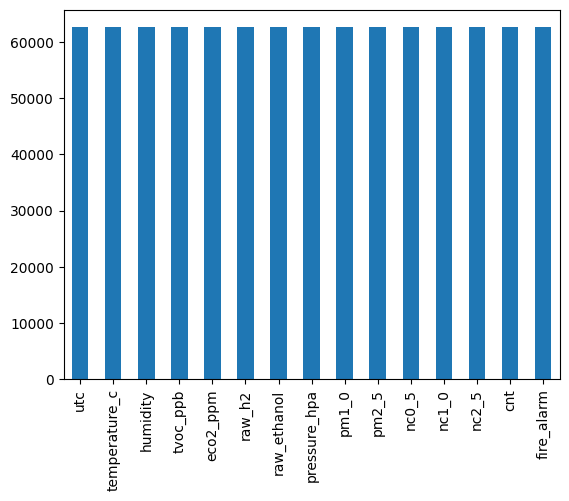

In [ ]:
data.count().plot.bar()

<Axes: >

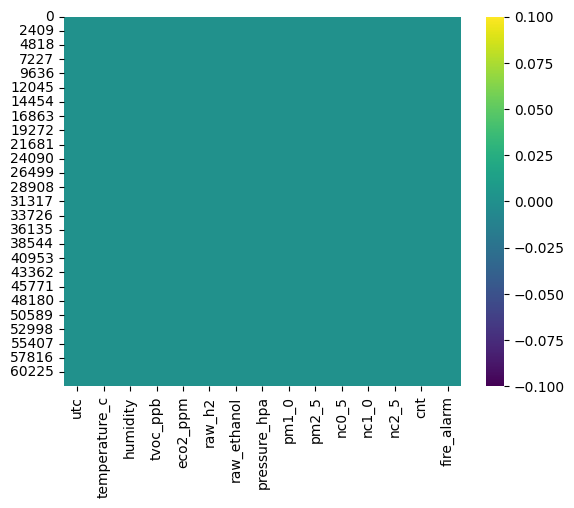

In [ ]:
sns.heatmap(data.isnull(), cmap='viridis')

<Axes: >

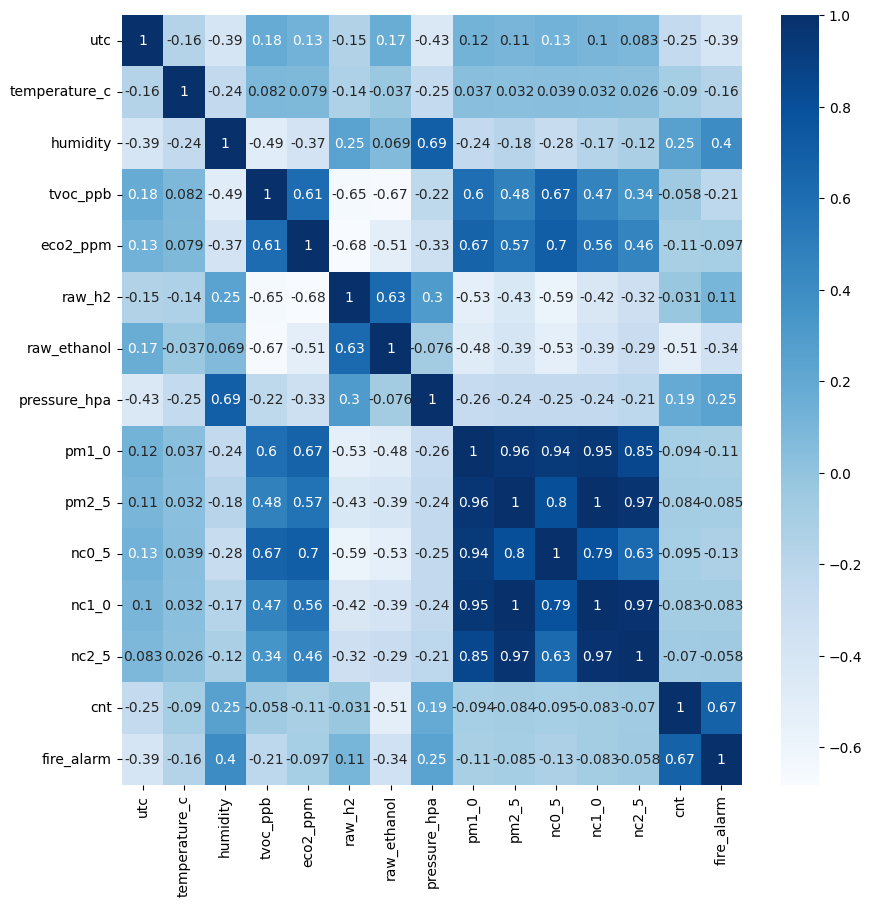

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), cbar=True, annot=True, cmap='Blues')

<Axes: >

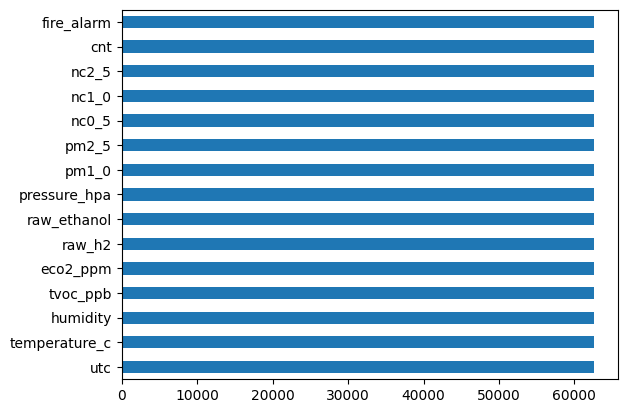

In [ ]:
data.count().plot.barh()

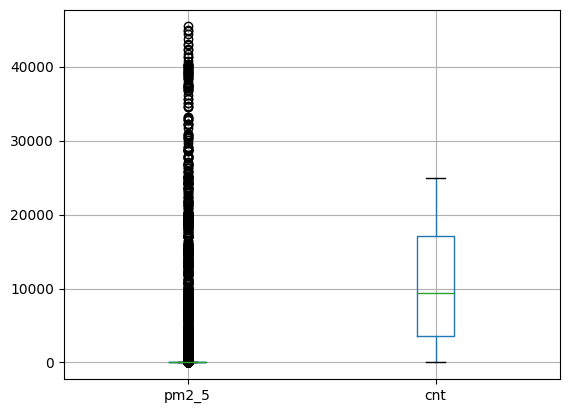

In [ ]:
data.boxplot(column=['pm2_5', 'cnt'])
plt.show()


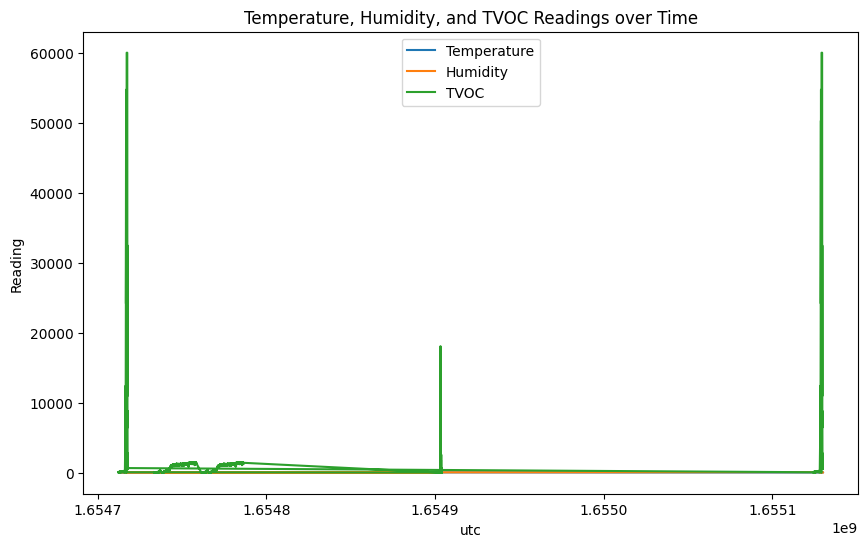

In [ ]:
# Set figure size
plt.figure(figsize=(10, 6))

# Plot temperature, humidity, and TVOC
plt.plot(data['utc'], data['temperature_c'], label='Temperature')
plt.plot(data['utc'], data['humidity'], label='Humidity')
plt.plot(data['utc'], data['tvoc_ppb'], label='TVOC')

# Set axis labels and title
plt.xlabel('utc')
plt.ylabel('Reading')
plt.title('Temperature, Humidity, and TVOC Readings over Time')

# Add legend and show the plot
plt.legend()
plt.show()



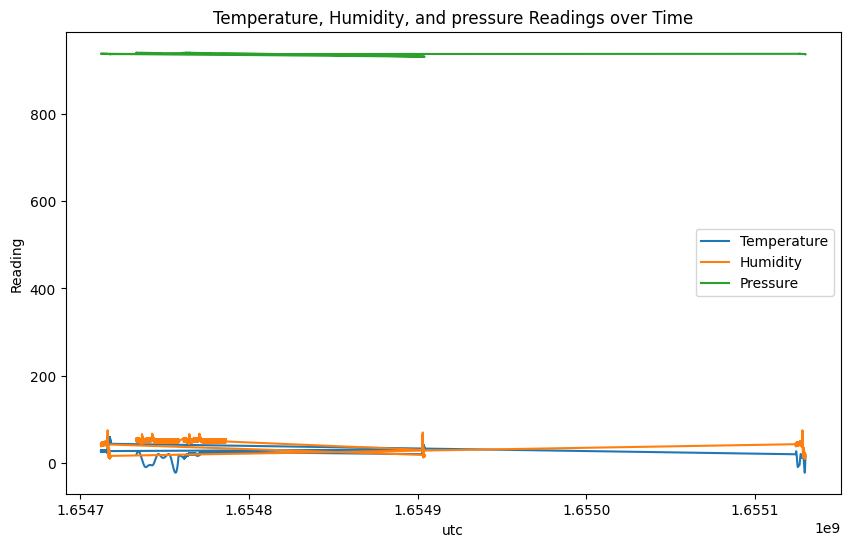

In [ ]:
# Set figure size
plt.figure(figsize=(10, 6))

# Plot temperature, humidity, and pressure_hpa
plt.plot(data['utc'], data['temperature_c'], label='Temperature')
plt.plot(data['utc'], data['humidity'], label='Humidity')
plt.plot(data['utc'], data['pressure_hpa'], label='Pressure')

# Set axis labels and title
plt.xlabel('utc')
plt.ylabel('Reading')
plt.title('Temperature, Humidity, and pressure Readings over Time')

# Add legend and show the plot
plt.legend()
plt.show()

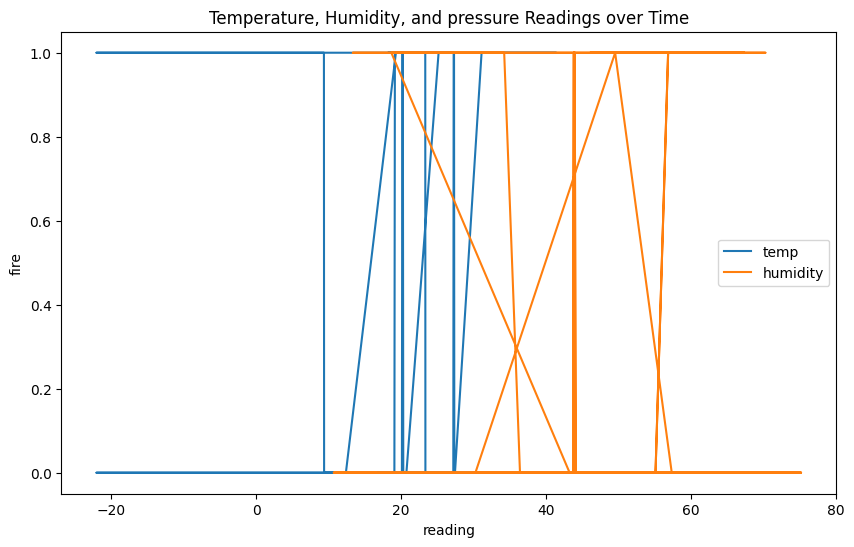

In [ ]:
# Set figure size
plt.figure(figsize=(10, 6))

# Plot temperature, humidity, and pressure_hpa
plt.plot(data['temperature_c'], data['fire_alarm'], label='temp')
plt.plot(data['humidity'], data['fire_alarm'], label='humidity')
#plt.plot(data['pressure_hpa'], data['fire_alarm'], label='pressure')

# Set axis labels and title
plt.xlabel('reading')
plt.ylabel('fire')
plt.title('Temperature, Humidity, and pressure Readings over Time')

# Add legend and show the plot
plt.legend()
plt.show()

<Axes: xlabel='temperature_c'>

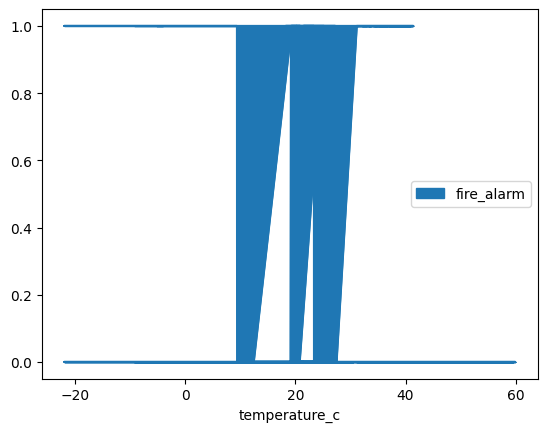

In [ ]:
data.plot.area(x='temperature_c',y='fire_alarm')

<Axes: xlabel='humidity'>

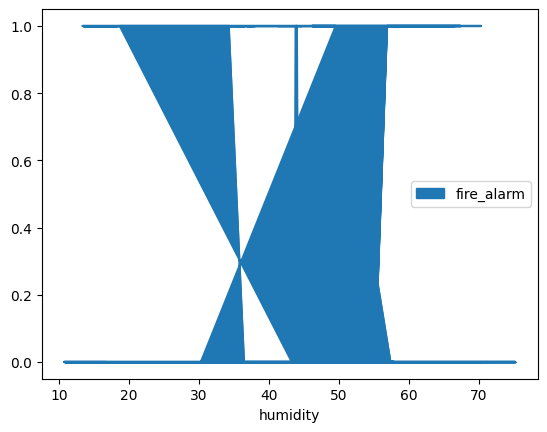

In [ ]:
data.plot.area(x='humidity',y='fire_alarm')

<Axes: xlabel='pressure_hpa'>

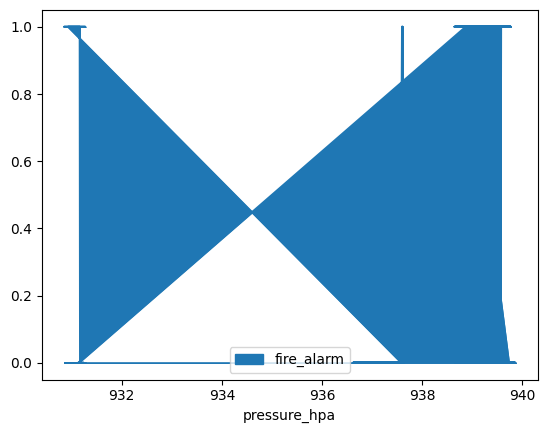

In [ ]:
data.plot.area(x='pressure_hpa',y='fire_alarm')

<Axes: ylabel='count'>

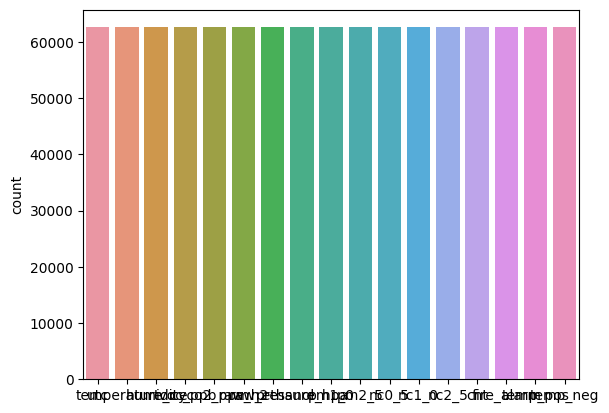

In [ ]:
sns.countplot(data=data)

<Axes: >

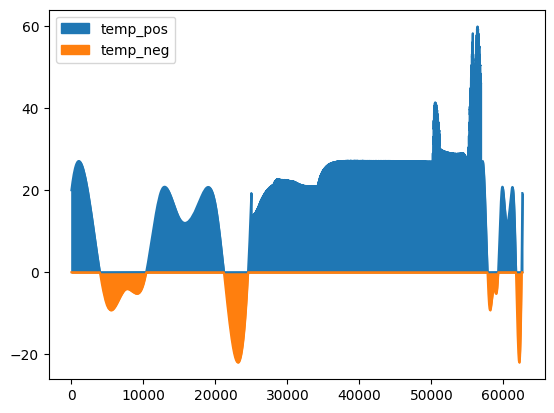

In [ ]:
# create a new column for positive values
data['temp_pos'] = data['temperature_c'].apply(lambda x: max(x, 0))

# create a new column for negative values
data['temp_neg'] = data['temperature_c'].apply(lambda x: min(x, 0))

# create a stacked area plot with the new columns
data.plot.area(y=['temp_pos', 'temp_neg'], stacked=True)


<Axes: >

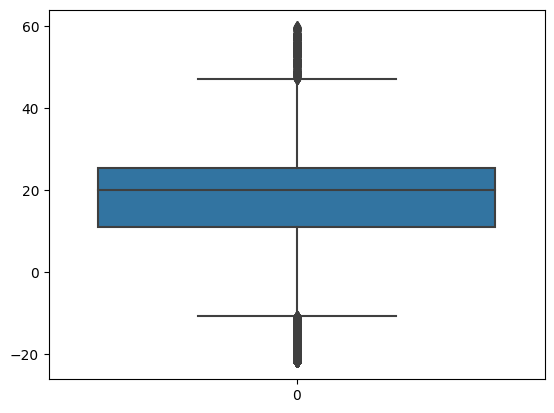

In [ ]:
sns.boxplot(data=data.temperature_c)

<Axes: >

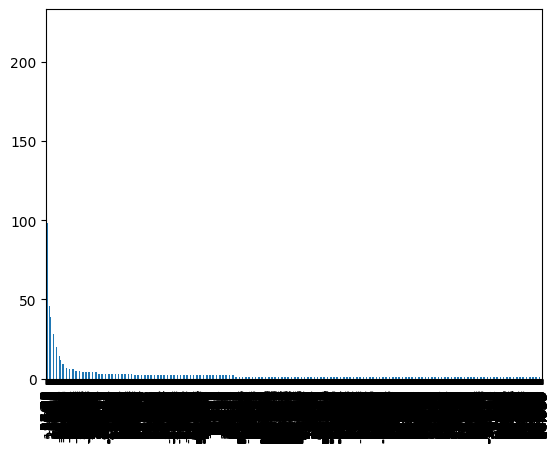

In [ ]:
data.temperature_c.value_counts().plot.bar()

<Axes: >

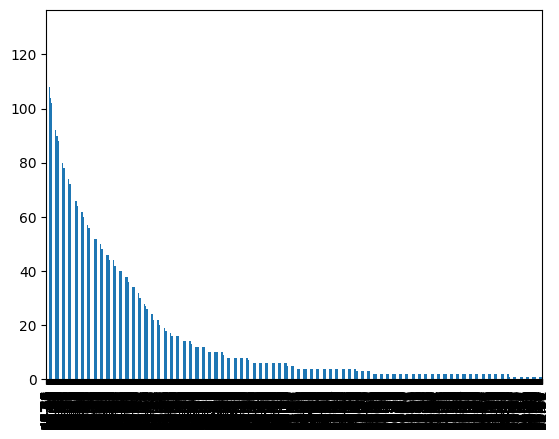

In [ ]:
data.humidity.value_counts().plot.bar()

<Axes: >

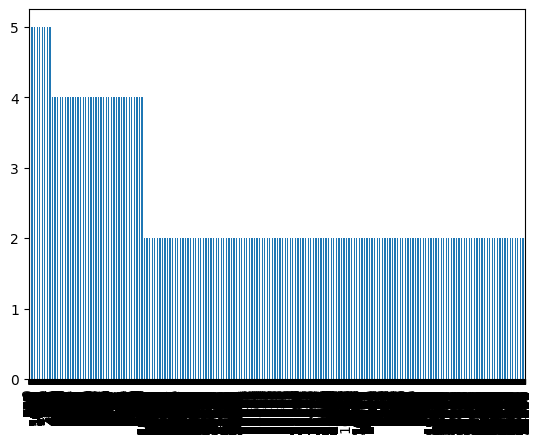

In [ ]:
data.cnt.value_counts().plot.bar()

<Axes: >

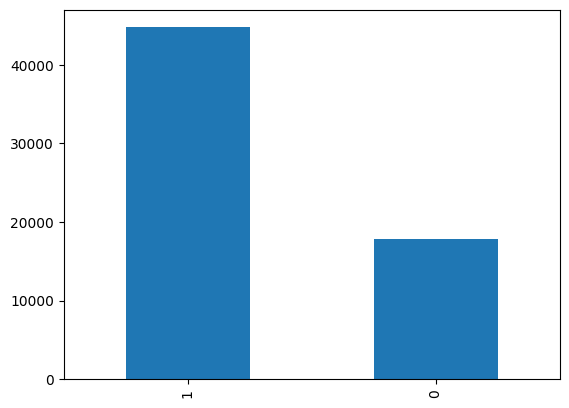

In [ ]:
data.fire_alarm.value_counts().plot.bar()

<Axes: >

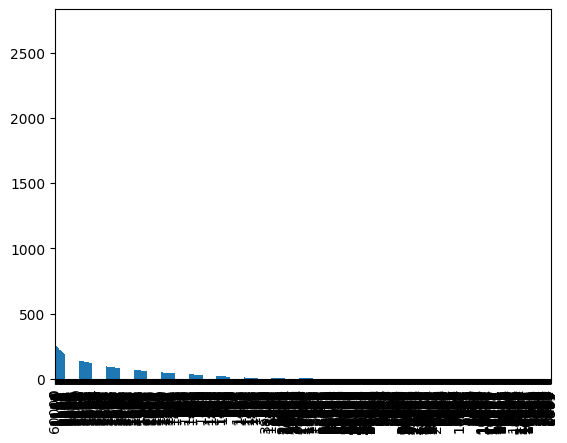

In [ ]:
data.tvoc_ppb.value_counts().plot.bar()

<Axes: >

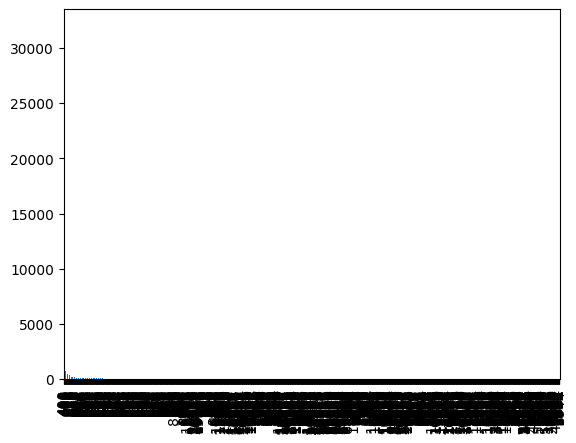

In [ ]:
data.eco2_ppm.value_counts().plot.bar()

In [ ]:
data.head()

column_a         utc  temperature_c  humidity  tvoc_ppb  eco2_ppm  raw_h2  \
0         0  1654733331         20.000     57.36         0       400   12306   
1         1  1654733332         20.015     56.67         0       400   12345   
2         2  1654733333         20.029     55.96         0       400   12374   
3         3  1654733334         20.044     55.28         0       400   12390   
4         4  1654733335         20.059     54.69         0       400   12403   

   raw_ethanol  pressure_hpa  pm1_0  pm2_5  nc0_5  nc1_0  nc2_5  cnt  \
0        18520       939.735    0.0    0.0    0.0    0.0    0.0    0   
1        18651       939.744    0.0    0.0    0.0    0.0    0.0    1   
2        18764       939.738    0.0    0.0    0.0    0.0    0.0    2   
3        18849       939.736    0.0    0.0    0.0    0.0    0.0    3   
4        18921       939.744    0.0    0.0    0.0    0.0    0.0    4   

   fire_alarm  temp_pos  temp_neg  
0           0    20.000       0.0  
1           0    20.015       0.0  
2           0    20.029       0.0  
3           0    20.044       0.0  
4           0    20.059       0.0

<Axes: >

<Figure size 2000x2000 with 0 Axes>

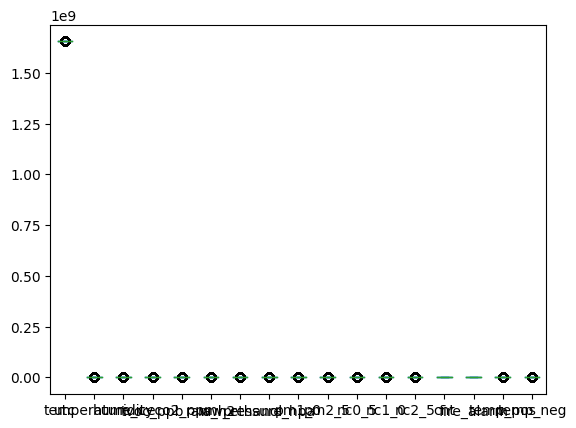

In [ ]:
# Set figure size
plt.figure(figsize=(20,20))

data.plot.box()

<Axes: xlabel='temperature_c', ylabel='fire_alarm'>

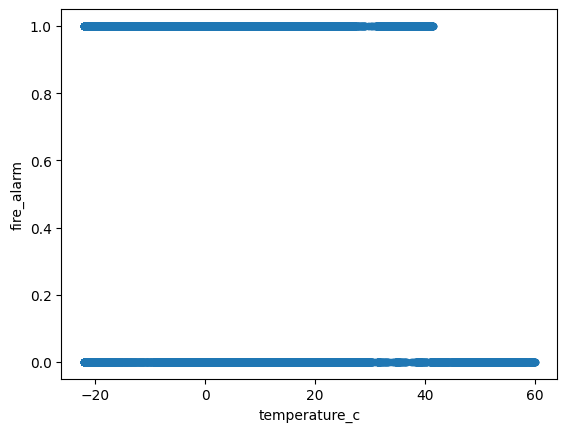

In [ ]:
data.plot.scatter(x='temperature_c', y='fire_alarm')

<Axes: xlabel='humidity', ylabel='temperature_c'>

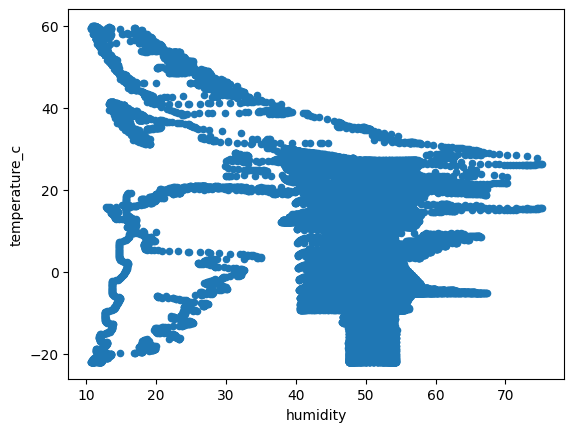

In [ ]:
data.plot.scatter(y='temperature_c', x='humidity')

<Axes: xlabel='temperature_c', ylabel='cnt'>

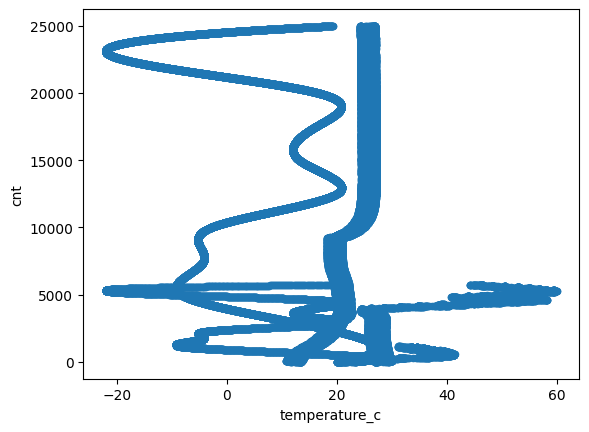

In [ ]:
data.plot.scatter(x='temperature_c', y='cnt')

<Axes: xlabel='tvoc_ppb', ylabel='cnt'>

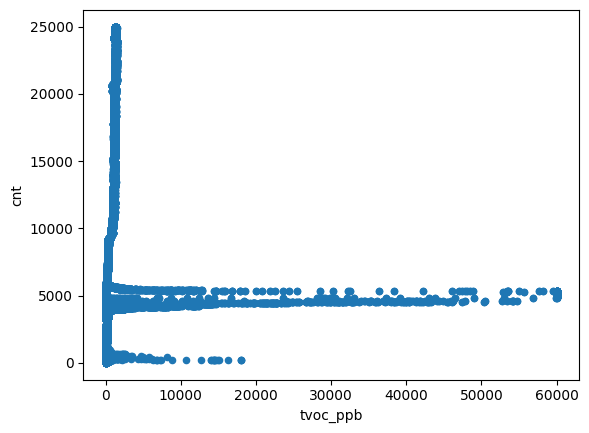

In [ ]:
data.plot.scatter(x='tvoc_ppb', y='cnt')

<Axes: xlabel='temperature_c', ylabel='tvoc_ppb'>

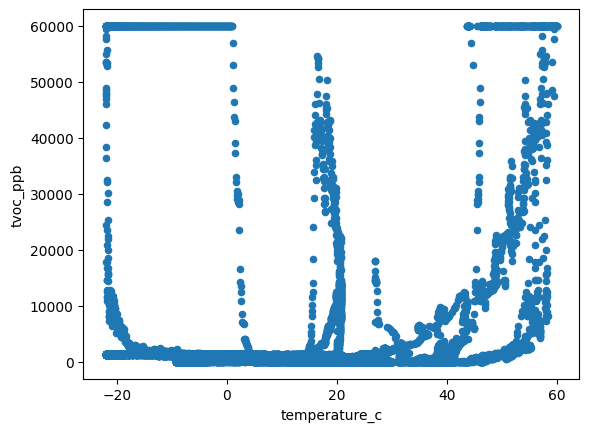

In [ ]:
data.plot.scatter(x='temperature_c', y='tvoc_ppb')

<Axes: xlabel='tvoc_ppb', ylabel='humidity'>

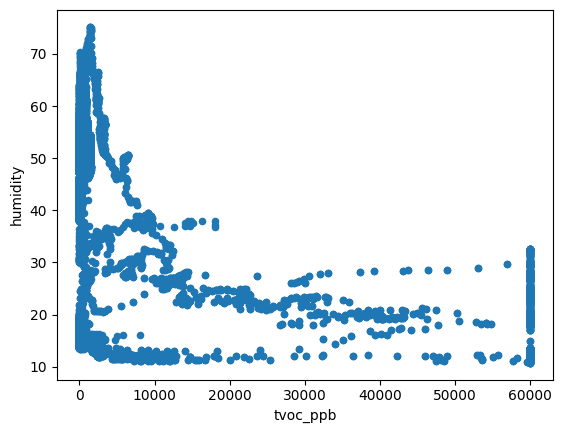

In [ ]:
data.plot.scatter(y='humidity', x='tvoc_ppb')

array([[<Axes: title={'center': 'utc'}>,
        <Axes: title={'center': 'temperature_c'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'tvoc_ppb'}>],
       [<Axes: title={'center': 'eco2_ppm'}>,
        <Axes: title={'center': 'raw_h2'}>,
        <Axes: title={'center': 'raw_ethanol'}>,
        <Axes: title={'center': 'pressure_hpa'}>],
       [<Axes: title={'center': 'pm1_0'}>,
        <Axes: title={'center': 'pm2_5'}>,
        <Axes: title={'center': 'nc0_5'}>,
        <Axes: title={'center': 'nc1_0'}>],
       [<Axes: title={'center': 'nc2_5'}>,
        <Axes: title={'center': 'cnt'}>,
        <Axes: title={'center': 'fire_alarm'}>,
        <Axes: title={'center': 'temp_pos'}>],
       [<Axes: title={'center': 'temp_neg'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

<Figure size 2000x2000 with 0 Axes>

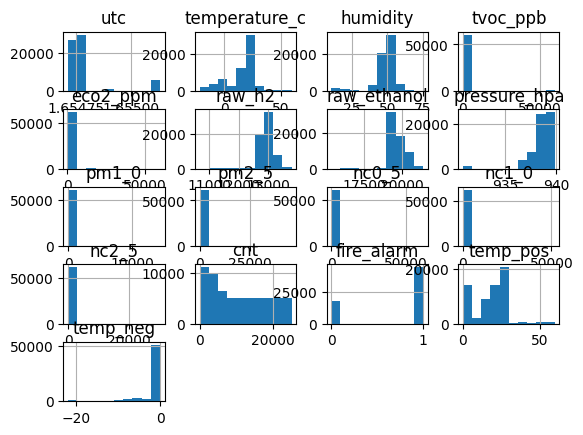

In [ ]:
plt.figure(figsize=(20,20))
data.hist()

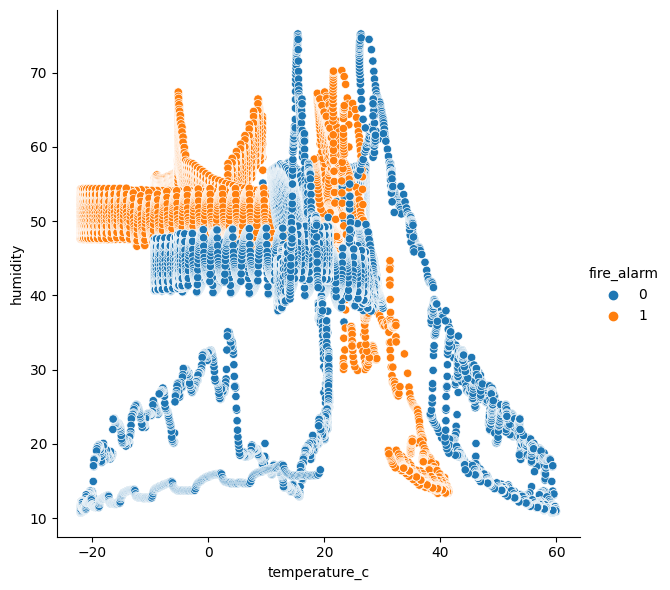

In [ ]:
sns.relplot(x='temperature_c', y='humidity', hue='fire_alarm', data=data, height=6)


In [ ]:
data.head()

utc  temperature_c  humidity  tvoc_ppb  eco2_ppm  raw_h2  \
0  1654733331         20.000     57.36         0       400   12306   
1  1654733332         20.015     56.67         0       400   12345   
2  1654733333         20.029     55.96         0       400   12374   
3  1654733334         20.044     55.28         0       400   12390   
4  1654733335         20.059     54.69         0       400   12403   

   raw_ethanol  pressure_hpa  pm1_0  pm2_5  nc0_5  nc1_0  nc2_5  cnt  \
0        18520       939.735    0.0    0.0    0.0    0.0    0.0    0   
1        18651       939.744    0.0    0.0    0.0    0.0    0.0    1   
2        18764       939.738    0.0    0.0    0.0    0.0    0.0    2   
3        18849       939.736    0.0    0.0    0.0    0.0    0.0    3   
4        18921       939.744    0.0    0.0    0.0    0.0    0.0    4   

   fire_alarm  
0           0  
1           0  
2           0  
3           0  
4           0

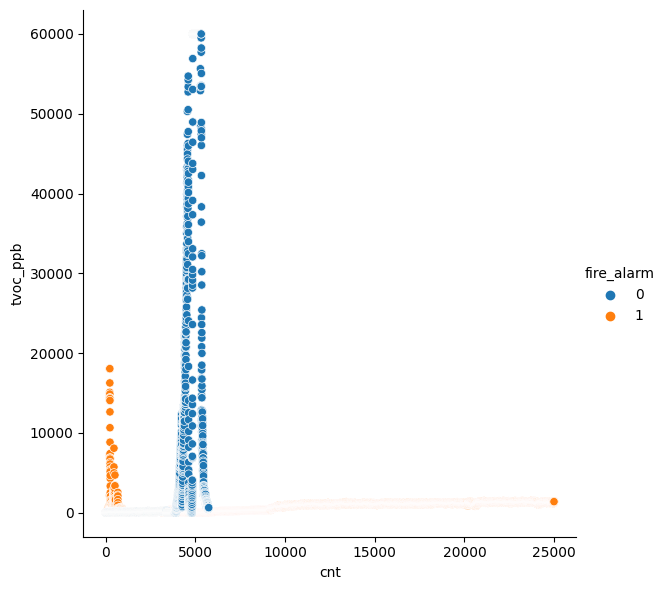

In [ ]:
sns.relplot(x='cnt', y='tvoc_ppb', hue='fire_alarm', data=data, height=6)

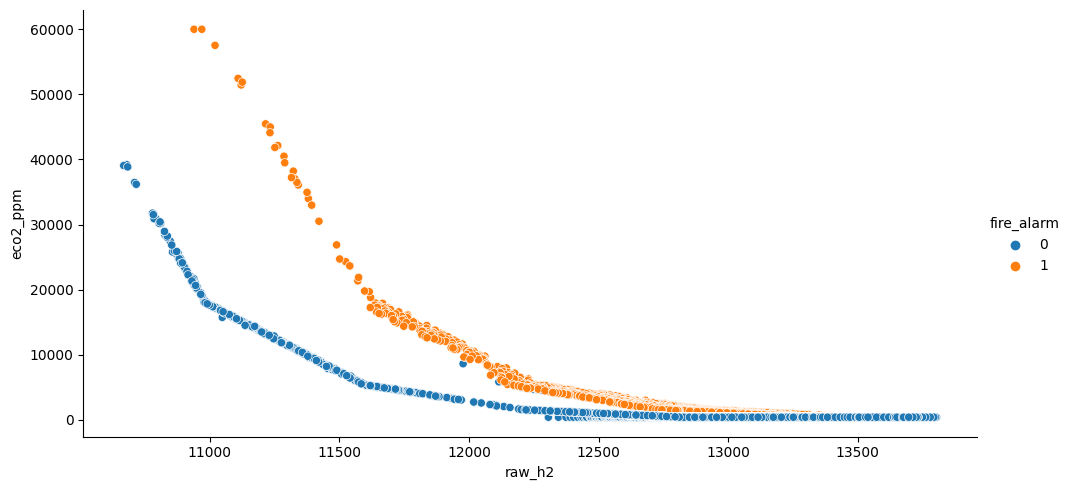

In [ ]:
sns.relplot(x='raw_h2', y='eco2_ppm', hue='fire_alarm', data=data, height=5,aspect=2)

calculations

#MAIN visualisation

In [ ]:
data.columns

Index(['utc', 'temperature_c', 'humidity', 'tvoc_ppb', 'eco2_ppm', 'raw_h2',
       'raw_ethanol', 'pressure_hpa', 'pm1_0', 'pm2_5', 'nc0_5', 'nc1_0',
       'nc2_5', 'cnt', 'fire_alarm'],
      dtype='object')

In [ ]:


continuous_vars = ['utc', 'temperature_c', 'humidity', 'tvoc_ppb', 'eco2_ppm', 'raw_h2',
       'raw_ethanol', 'pressure_hpa', 'pm1_0', 'pm2_5', 'nc0_5', 'nc1_0',
       'nc2_5', 'cnt']

for var in continuous_vars:
    median = data[var].median()
    std = data[var].std()
    print(f'{var} median: {median:.2f}')
    print(f'{var} std: {std:.2f}')


utc median: 1654761919.50
utc std: 110002.49
temperature_c median: 20.13
temperature_c std: 14.36
humidity median: 50.15
humidity std: 8.87
tvoc_ppb median: 981.00
tvoc_ppb std: 7811.59
eco2_ppm median: 400.00
eco2_ppm std: 1905.89
raw_h2 median: 12924.00
raw_h2 std: 272.46
raw_ethanol median: 19501.00
raw_ethanol std: 609.51
pressure_hpa median: 938.82
pressure_hpa std: 1.33
pm1_0 median: 1.81
pm1_0 std: 922.52
pm2_5 median: 1.88
pm2_5 std: 1976.31
nc0_5 median: 12.45
nc0_5 std: 4265.66
nc1_0 median: 1.94
nc1_0 std: 2214.74
nc2_5 median: 0.04
nc2_5 std: 1083.38
cnt median: 9336.00
cnt std: 7597.87


Here's a possible mathematical procedure to calculate the presence of fire or smoke from the given data:

1. Calculate the median and standard deviation for each continuous variable (Temperature[C], Humidity[%], TVOC[ppb], eCO2[ppm], Raw H2, Raw Ethanol, Pressure[hPa], PM1.0, PM2.5, NC0.5, NC1.0, NC2.5, CNT) across all observations. These values will be used as reference points for detecting anomalies.

2. For each observation, check if the Fire Alarm variable is set to 1. If it is, then there is a high likelihood that a fire has been detected. In this case, emergency procedures should be followed immediately.

3. For each observation, check if the temperature reading is greater than the median temperature plus 3 standard deviations. If it is, then it could indicate the presence of a fire.

4. For each observation, check if the Raw H2 and Raw Ethanol readings are greater than the median plus 3 standard deviations. If they are, then it could indicate the presence of smoke.

5. For each observation, check if the TVOC and eCO2 readings are greater than the median plus 3 standard deviations. If they are, then it could indicate the presence of smoke.

6. For each observation, check if the PM1.0, PM2.5, NC0.5, NC1.0, NC2.5, and CNT readings are greater than the median plus 3 standard deviations. If they are, then it could indicate the presence of smoke particles in the air.

7. If any of the above checks are positive, then there is a potential presence of fire or smoke. Further analysis and confirmation should be done before taking any action.

It's important to note that the specific threshold values used (such as the 3 standard deviation cutoff) will depend on the specific context and requirements of the application, and should be validated and tuned accordingly.

In [ ]:
continuous_vars = ['utc', 'temperature_c', 'humidity', 'tvoc_ppb', 'eco2_ppm', 'raw_h2',
       'raw_ethanol', 'pressure_hpa', 'pm1_0', 'pm2_5', 'nc0_5', 'nc1_0',
       'nc2_5', 'cnt']

In [ ]:


for index, row in data.iterrows():
    temp = row['temperature_c']
    median_temp = data['temperature_c'].median()
    std_temp = data['temperature_c'].std()
    if temp > median_temp + 3*std_temp:
        print(f'Possible fire detected in observation {index}. Temperature: {temp:.2f}°C')


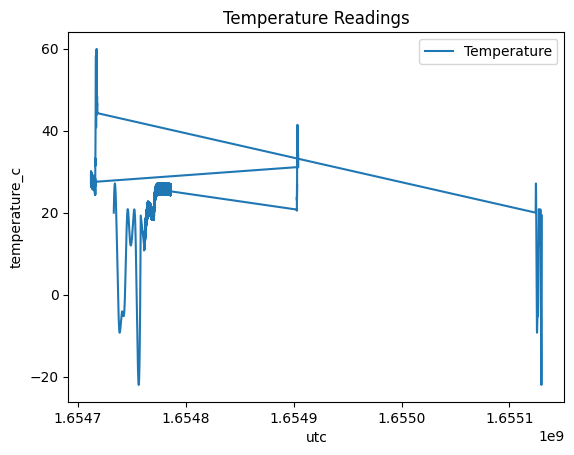

In [ ]:
fig, ax = plt.subplots()
ax.plot(data['utc'], data['temperature_c'], label='Temperature')
for index, row in data.iterrows():
    temp = row['temperature_c']
    median_temp = data['temperature_c'].median()
    std_temp = data['temperature_c'].std()
    if temp > median_temp + 3*std_temp:
        ax.scatter(row['utc'], temp, color='red', marker='*', label='Possible Fire')
ax.legend()
plt.xlabel('utc')
plt.ylabel('temperature_c')
plt.title('Temperature Readings')
plt.show()

In [ ]:
data.columns

Index(['utc', 'temperature_c', 'humidity', 'tvoc_ppb', 'eco2_ppm', 'raw_h2',
       'raw_ethanol', 'pressure_hpa', 'pm1_0', 'pm2_5', 'nc0_5', 'nc1_0',
       'nc2_5', 'cnt', 'fire_alarm'],
      dtype='object')

fig, ax = plt.subplots()
ax.scatter(data['raw_h2'], data['raw_ethanol'], label='Raw H2 and Ethanol')

for index, row in data.iterrows():
    raw_h2 = row['raw_h2']
    raw_ethanol = row['raw_ethanol']
    median_h2 = data['raw_h2'].median()
    std_h2 = data['raw_h2'].std()
    median_ethanol = data['raw_ethanol'].median()
    std_ethanol = data['raw_ethanol'].std()
    if raw_h2 > median_h2 + 3*std_h2 or raw_ethanol > median_ethanol + 3*std_ethanol:
       ax.scatter(raw_h2, raw_ethanol, color='red', marker='*', label='Possible Smoke')
ax.legend()
plt.xlabel('raw_h2')
plt.ylabel('raw_ethanol')
plt.title('Raw H2 and Ethanol Readings')
plt.show()

fig, ax = plt.subplots()
ax.scatter(df['Raw H2'], df['Raw Ethanol'], label='Raw H2 and Ethanol')
possible_smoke = []
for index, row in df.iterrows():
    raw_h2 = row['Raw H2']
    raw_ethanol = row['Raw Ethanol']
    median_h2 = df['Raw H2'].median()
    std_h2 = df['Raw H2'].std()
    median_ethanol = df['Raw Ethanol'].median()
    std_ethanol = df['Raw Ethanol'].std()
    if raw_h2 > median_h2 + 3*std_h2 or raw_ethanol > median_ethanol + 3*std_ethanol:
        possible_smoke.append(ax.scatter(raw_h2, raw_ethanol, color='red', marker='*'))
if possible_smoke:
    ax.legend([possible_smoke[0]], ['Possible Smoke'])
plt.xlabel('Raw H2')
plt.ylabel('Raw Ethanol')
plt.title('Raw H2 and Ethanol Readings')
plt.show()

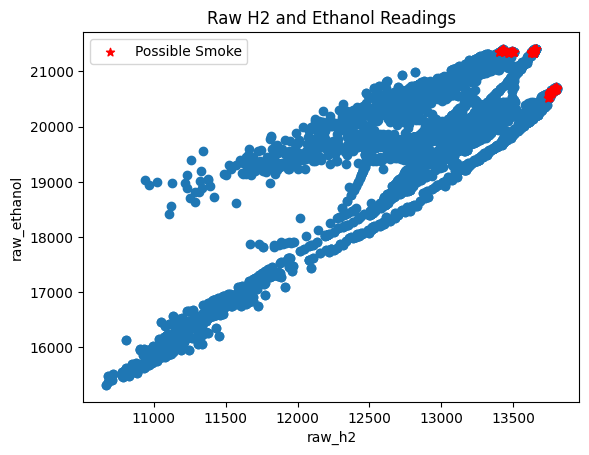

In [ ]:
fig, ax = plt.subplots()
ax.scatter(data['raw_h2'], data['raw_ethanol'], label='Raw H2 and Ethanol')
possible_smoke = []
for index, row in data.iterrows():
    raw_h2 = row['raw_h2']
    raw_ethanol = row['raw_ethanol']
    median_h2 = data['raw_h2'].median()
    std_h2 = data['raw_h2'].std()
    median_ethanol = data['raw_ethanol'].median()
    std_ethanol = data['raw_ethanol'].std()
    if raw_h2 > median_h2 + 3*std_h2 or raw_ethanol > median_ethanol + 3*std_ethanol:
        possible_smoke.append(ax.scatter(raw_h2, raw_ethanol, color='red', marker='*'))
if possible_smoke:
    ax.legend([possible_smoke[0]], ['Possible Smoke'])
plt.xlabel('raw_h2')
plt.ylabel('raw_ethanol')
plt.title('Raw H2 and Ethanol Readings')
plt.show()

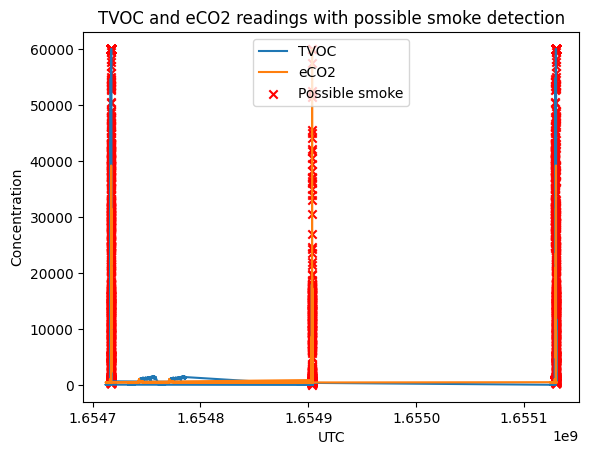

In [ ]:

# Calculate median and standard deviation for TVOC and eCO2
tvoc_median = data['tvoc_ppb'].median()
tvoc_std = data['tvoc_ppb'].std()
eco2_median = data['eco2_ppm'].median()
eco2_std = data['eco2_ppm'].std()

# Create a new column indicating the possible presence of smoke
data['Smoke'] = ((data['tvoc_ppb'] > (tvoc_median + 3*tvoc_std)) | 
                 (data['eco2_ppm'] > (eco2_median + 3*eco2_std))).astype(int)

# Visualize the data
plt.plot(data['utc'], data['tvoc_ppb'], label='TVOC')
plt.plot(data['utc'], data['eco2_ppm'], label='eCO2')
plt.scatter(data[data['Smoke'] == 1]['utc'], 
            data[data['Smoke'] == 1]['tvoc_ppb'], 
            c='r', marker='x', label='Possible smoke')
plt.scatter(data[data['Smoke'] == 1]['utc'], 
            data[data['Smoke'] == 1]['eco2_ppm'], 
            c='r', marker='x')
plt.legend()
plt.xlabel('UTC')
plt.ylabel('Concentration')
plt.title('TVOC and eCO2 readings with possible smoke detection')
plt.show()

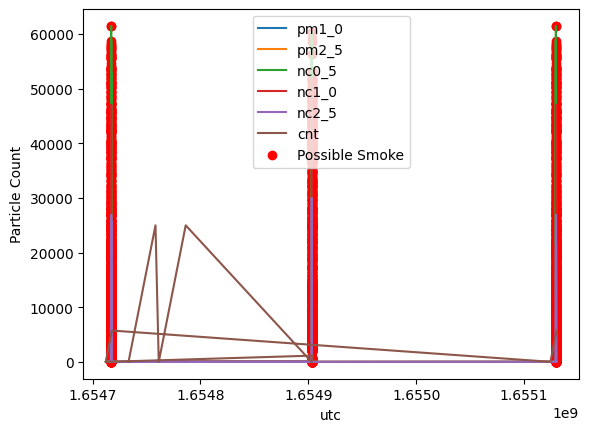

In [ ]:

# Calculate median and standard deviation for each continuous variable
median = data.median()
std = data.std()

# Check for presence of smoke particles
smoke_mask = ((data['pm1_0'] > median['pm1_0'] + 3*std['pm1_0']) |
              (data['pm2_5'] > median['pm2_5'] + 3*std['pm2_5']) |
              (data['nc0_5'] > median['nc0_5'] + 3*std['nc0_5']) |
              (data['nc1_0'] > median['nc1_0'] + 3*std['nc1_0']) |
              (data['nc2_5'] > median['nc2_5'] + 3*std['nc2_5']) |
              (data['cnt'] > median['cnt'] + 3*std['cnt']))

# Plot smoke particles
plt.plot(data['utc'], data['pm1_0'], label='pm1_0')
plt.plot(data['utc'], data['pm2_5'], label='pm2_5')
plt.plot(data['utc'], data['nc0_5'], label='nc0_5')
plt.plot(data['utc'], data['nc1_0'], label='nc1_0')
plt.plot(data['utc'], data['nc2_5'], label='nc2_5')
plt.plot(data['utc'], data['cnt'], label='cnt')
plt.scatter(data.loc[smoke_mask, 'utc'], data.loc[smoke_mask, 'pm1_0'], color='red', label='Possible Smoke')
plt.scatter(data.loc[smoke_mask, 'utc'], data.loc[smoke_mask, 'pm2_5'], color='red')
plt.scatter(data.loc[smoke_mask, 'utc'], data.loc[smoke_mask, 'nc0_5'], color='red')
plt.scatter(data.loc[smoke_mask, 'utc'], data.loc[smoke_mask, 'nc1_0'], color='red')
plt.scatter(data.loc[smoke_mask, 'utc'], data.loc[smoke_mask, 'nc2_5'], color='red')
plt.scatter(data.loc[smoke_mask, 'utc'], data.loc[smoke_mask, 'cnt'], color='red')
plt.xlabel('utc')
plt.ylabel('Particle Count')
plt.legend()
plt.show()

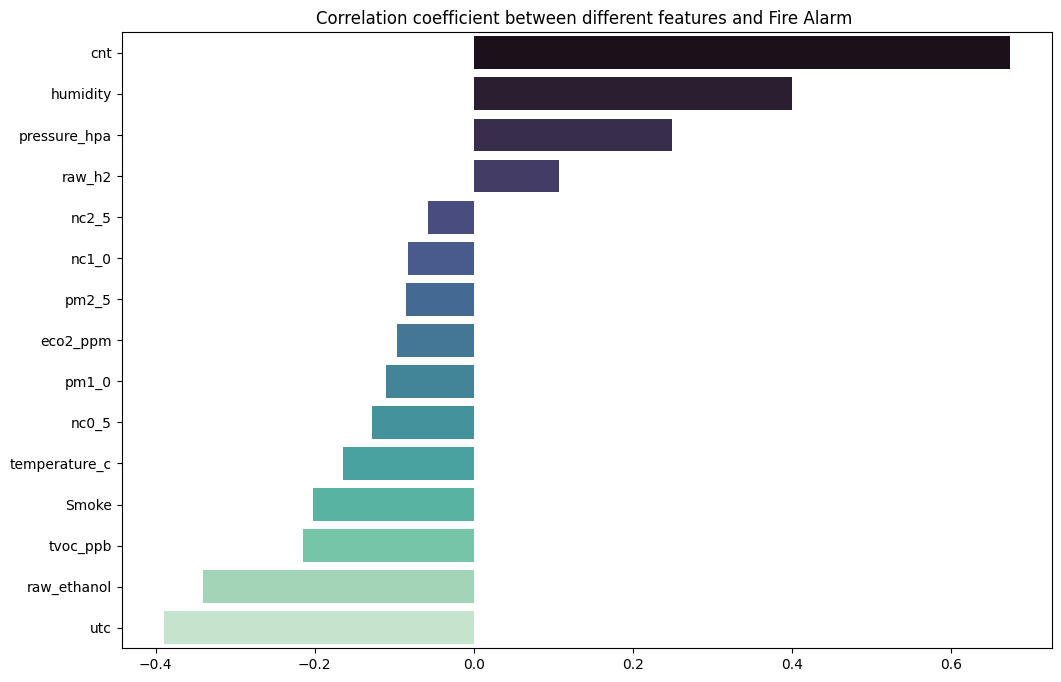

In [ ]:
plt.figure(figsize=(12,8))
data_4 = data.corr()["fire_alarm"].sort_values(ascending=False)
indices = data_4.index
labels = []
corr = []
for i in range(1, len(indices)):
    labels.append(indices[i])
    corr.append(data_4[i])
sns.barplot(x=corr, y=labels, palette='mako')
plt.title('Correlation coefficient between different features and Fire Alarm ')
plt.show()

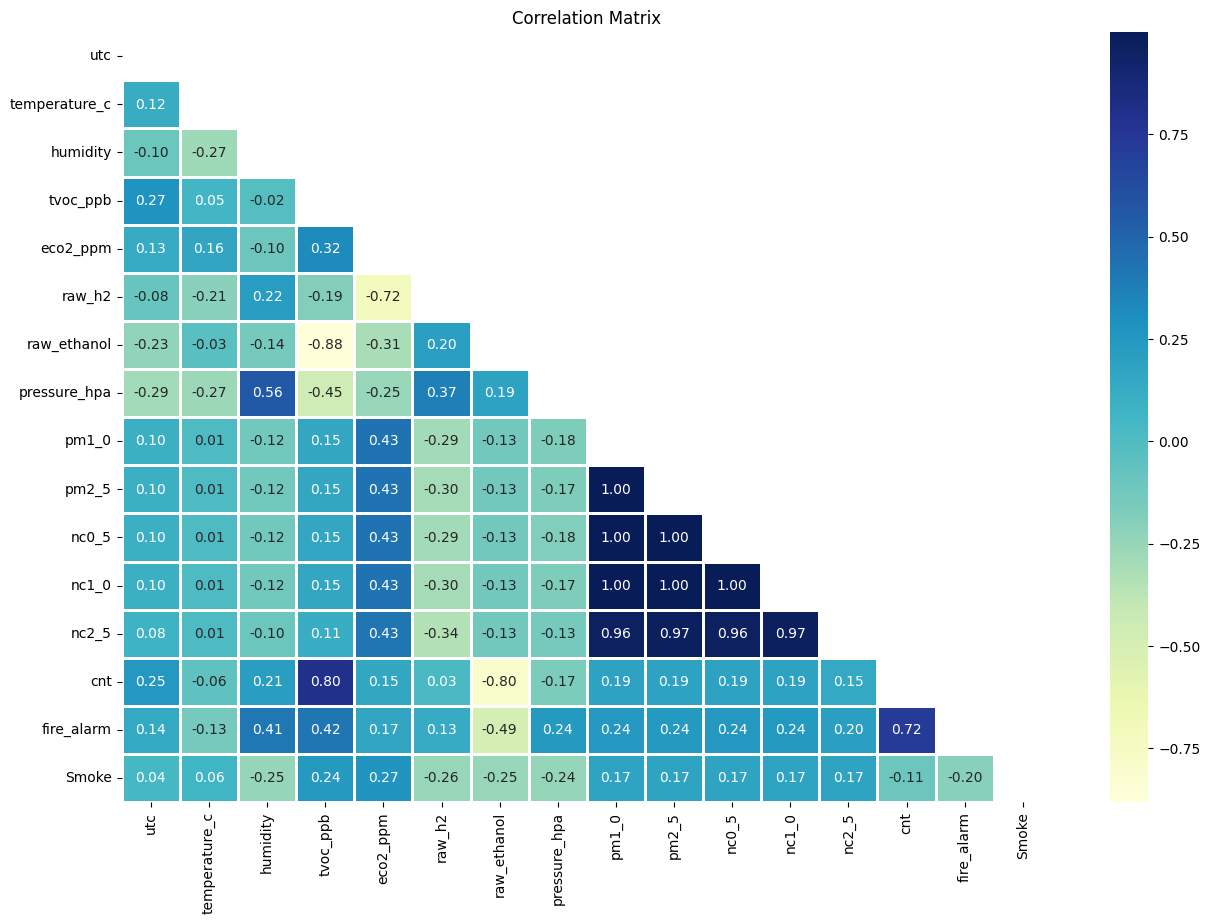

In [ ]:
plt.figure(figsize = (15,10))
corr = data.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
cormat = sns.heatmap(corr, mask=mask, annot=True, cmap='YlGnBu', linewidths=1, fmt=".2f")
cormat.set_title('Correlation Matrix')
plt.show()

In [ ]:
yes_fire = data[(data['fire_alarm'] != 0)]
no_fire = data[(data['fire_alarm'] == 0)]

trace = go.Bar(x = (len(no_fire), len(yes_fire)), y = ['No_fire', 'Yes_fire'], orientation = 'h', opacity = 0.8, marker=dict(
        color=['orange', 'darkblue'],
        line=dict(color='#000000',width=1.5)))

layout = dict(title =  'Count of Fire Alarm variable')
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

In [ ]:
trace = go.Pie(labels = ['Yes_Fire', 'No_Fire'], values = data['fire_alarm'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['ldarkblue','orange'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of Fire Alarm variable')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

<ipython-input-55-037d4ceccf2f>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




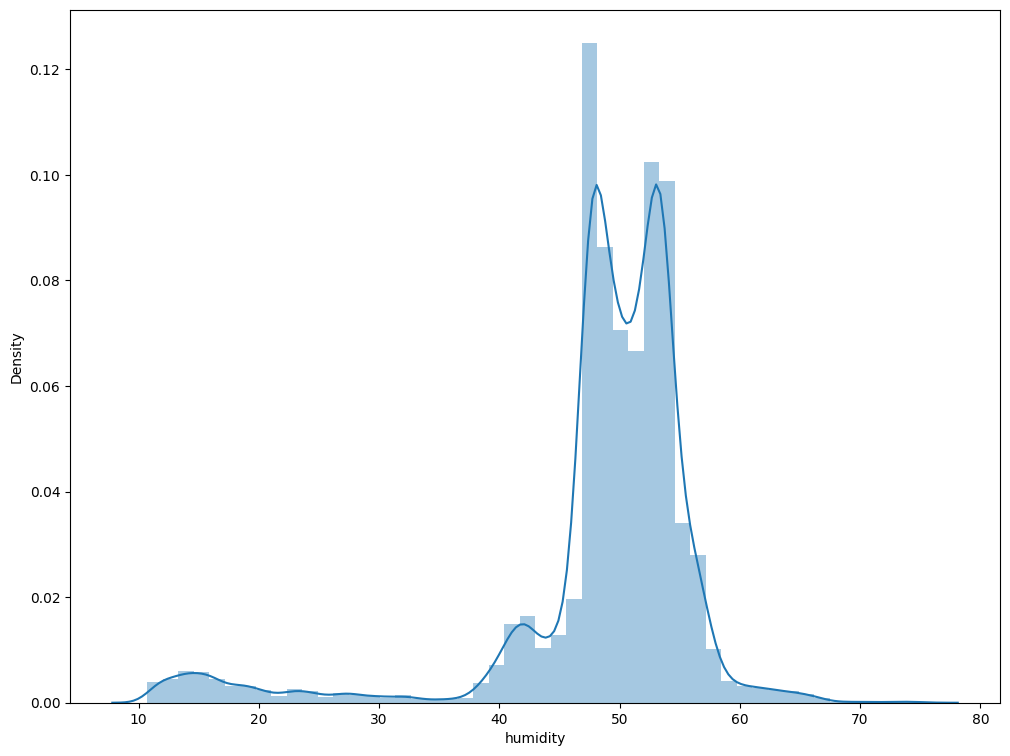

In [ ]:
plt.figure(figsize=(12,9))
sns.distplot(data['humidity'])
plt.show()

<ipython-input-7-960105c1260b>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




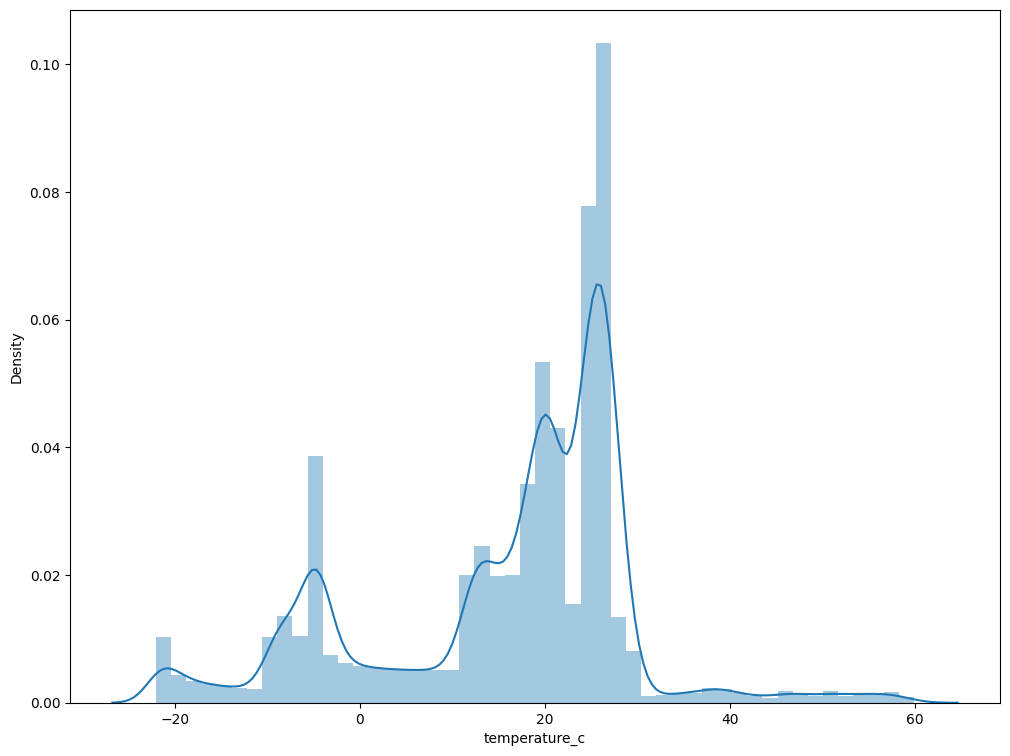

In [ ]:
plt.figure(figsize=(12,9))
sns.distplot(data['temperature_c'])
plt.show()

<ipython-input-8-947cb7685c03>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




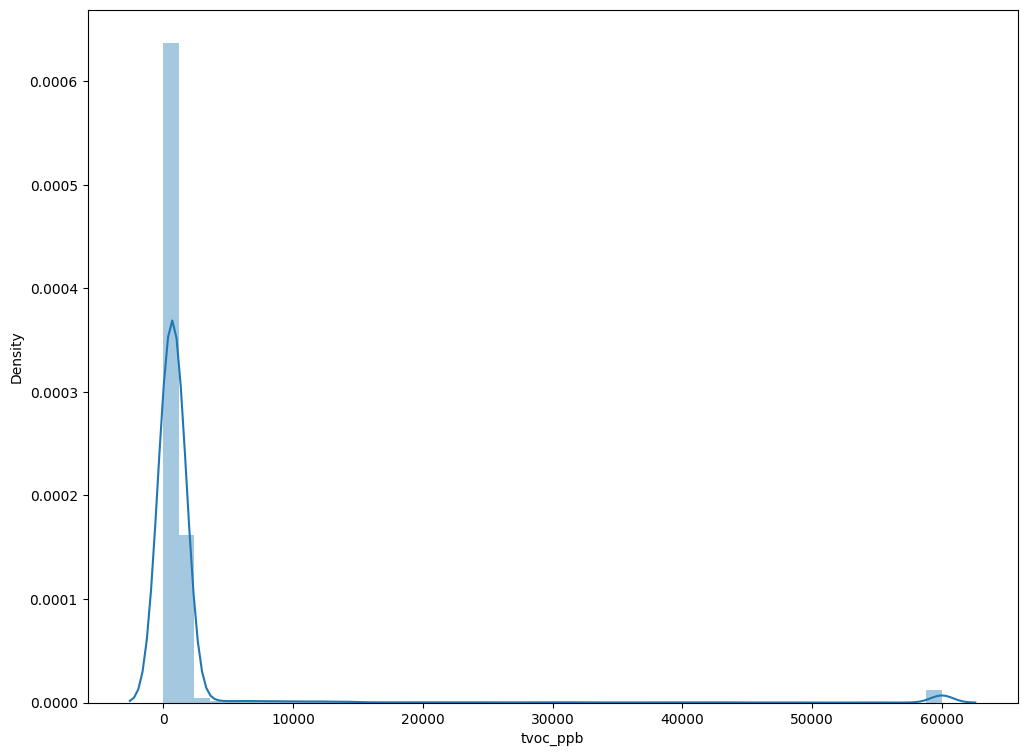

In [ ]:
plt.figure(figsize=(12,9))
sns.distplot(data['tvoc_ppb'])
plt.show()

<ipython-input-9-60e01b3cd865>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




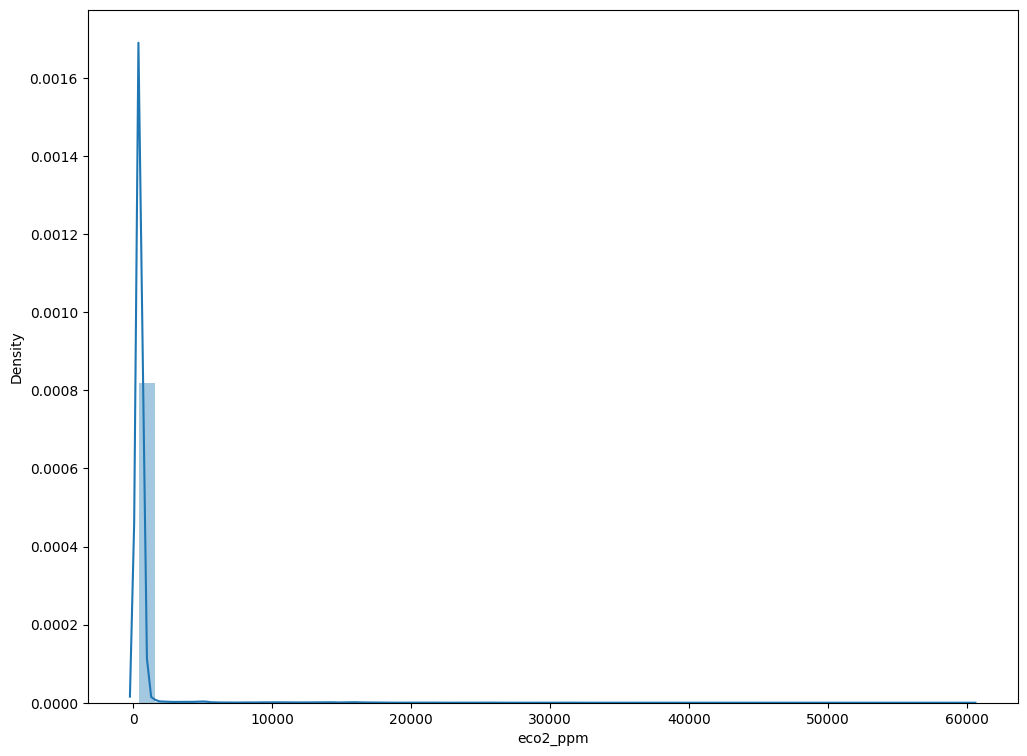

In [ ]:
plt.figure(figsize=(12,9))
sns.distplot(data['eco2_ppm'])
plt.show()

<ipython-input-10-4867cc85daba>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




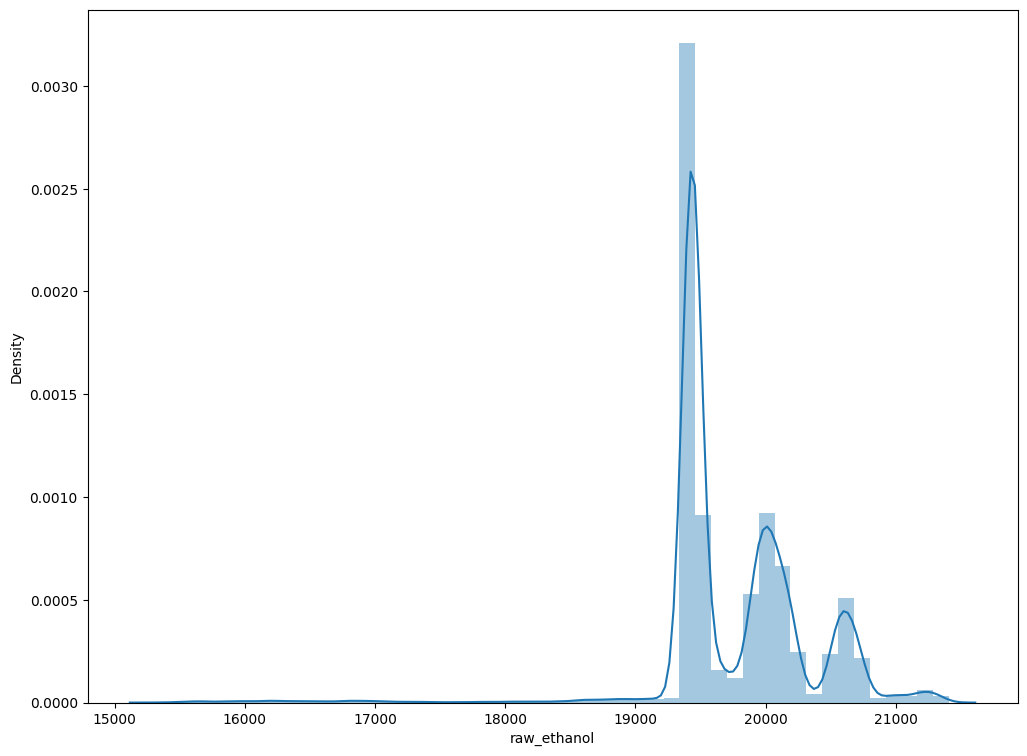

In [ ]:
plt.figure(figsize=(12,9))
sns.distplot(data['raw_ethanol'])
plt.show()

<ipython-input-11-5bd7ab6a5670>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




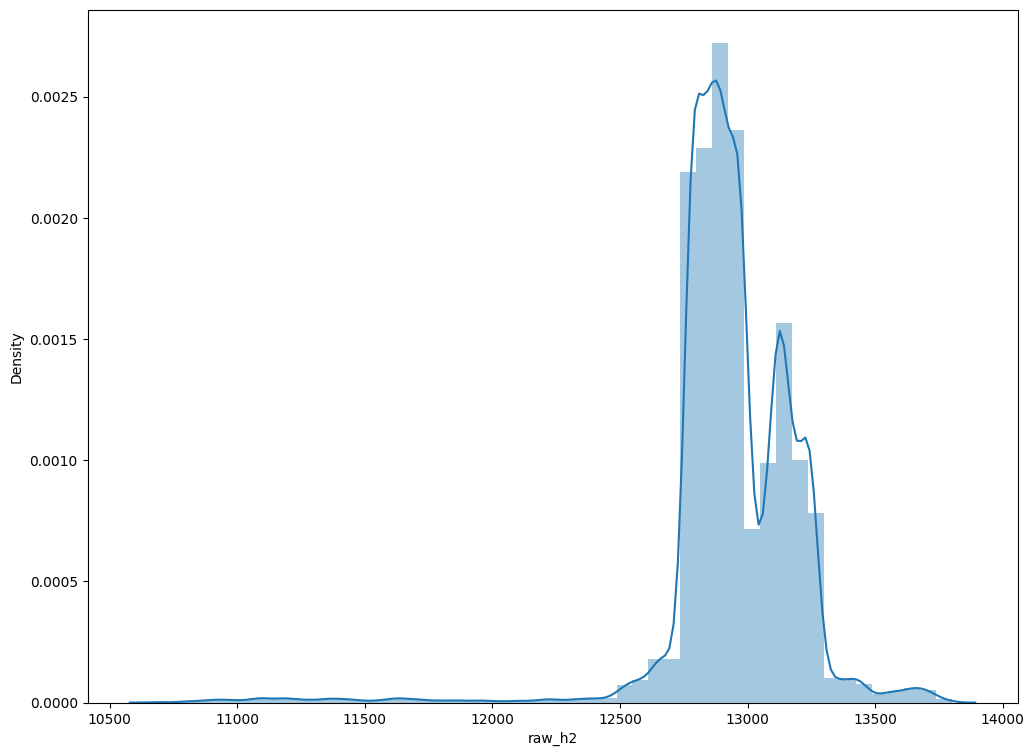

In [ ]:
plt.figure(figsize=(12,9))
sns.distplot(data['raw_h2'])
plt.show()

<ipython-input-14-27ab5fc8ebe9>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




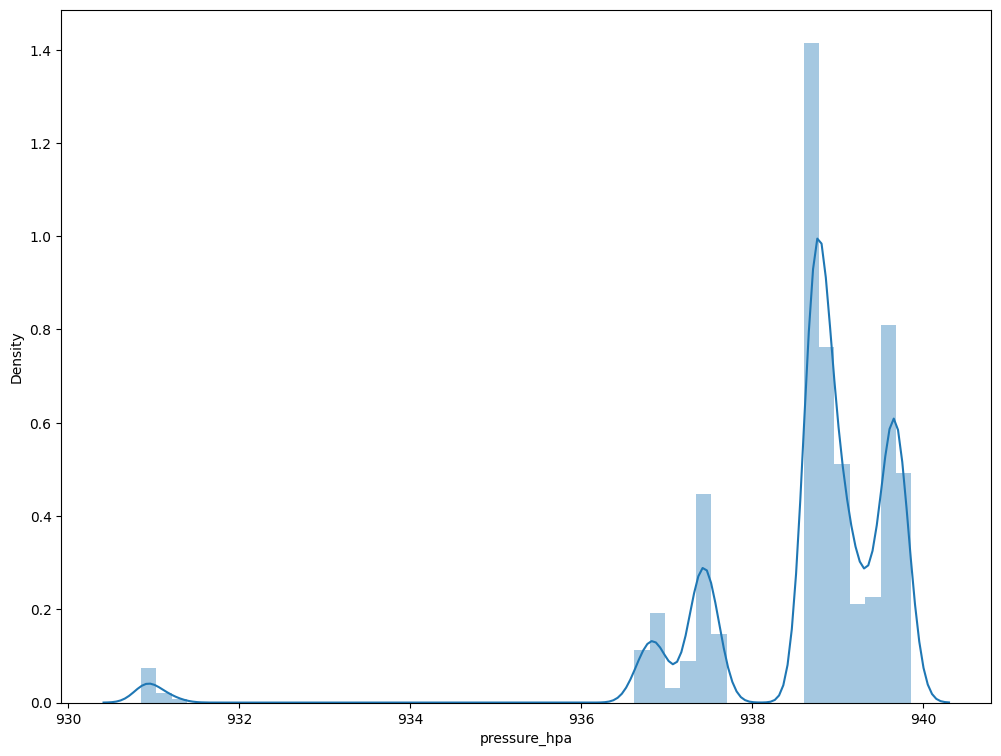

In [ ]:

plt.figure(figsize=(12,9))
sns.distplot(data['pressure_hpa'])
plt.show()

<ipython-input-12-9c1de6badfea>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




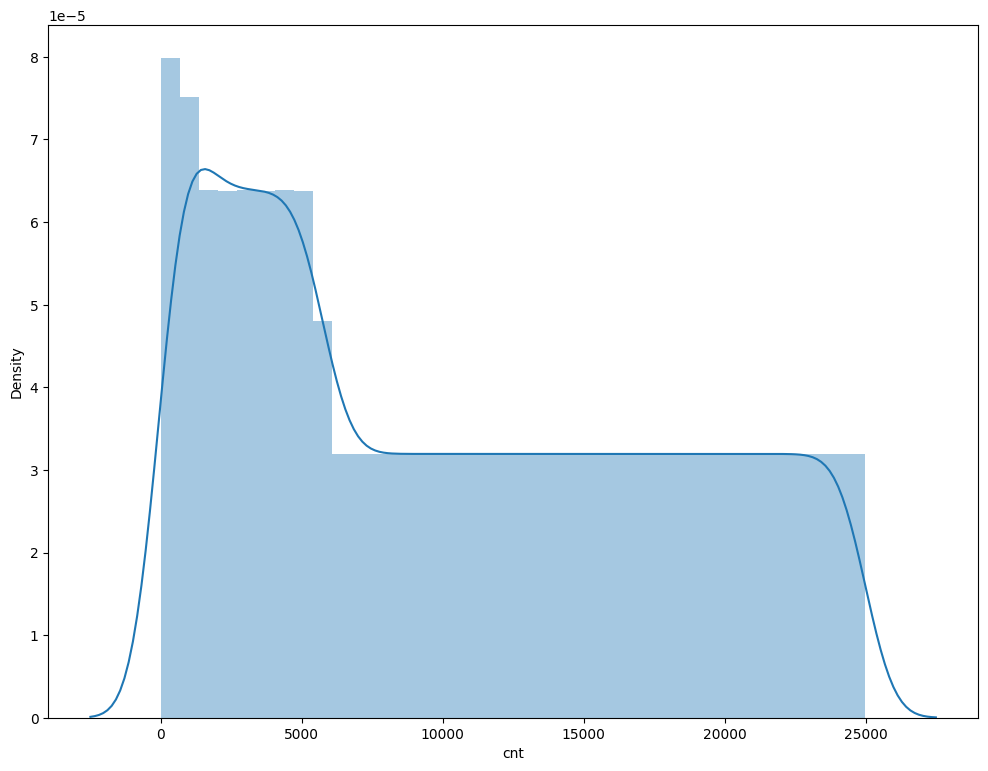

In [ ]:
plt.figure(figsize=(12,9))
sns.distplot(data['cnt'])
plt.show()

#Training of the model

In [ ]:
input_cols = list(data.columns)[1:-2]
target_col = ['fire_alarm']

In [ ]:
train_inputs = data[input_cols].copy()
train_targets = data[target_col].copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_inputs, train_targets, test_size=0.2,random_state=42)

In [ ]:
X_train.shape


(50104, 12)

In [ ]:
X_test.shape

(12526, 12)

In [ ]:
X_train.head()

temperature_c  humidity  tvoc_ppb  eco2_ppm  raw_h2  raw_ethanol  \
28479         21.430     59.72       283       400   13138        19923   
42605         25.980     47.24      1247       422   12886        19423   
17963         18.116     47.55      1124       400   12909        19446   
56394         59.620     11.60     60000      4305   11771        17216   
29875         22.250     48.83        24       400   13255        20202   

       pressure_hpa    pm1_0    pm2_5    nc0_5     nc1_0    nc2_5  
28479       939.672     1.38     1.43     9.48     1.478    0.033  
42605       938.734     1.73     1.79    11.88     1.853    0.042  
17963       938.710     1.56     1.62    10.75     1.677    0.038  
56394       936.746  1382.21  1624.71  9039.26  1709.083  216.618  
29875       939.700     2.25     2.33    15.47     2.412    0.054

In [ ]:
scaler = MinMaxScaler().fit(data[input_cols])

X_train[input_cols] = scaler.transform(X_train[input_cols])
X_test[input_cols] = scaler.transform(X_test[input_cols])

In [ ]:
X_test.describe().loc[['min', 'max']]

temperature_c  humidity  tvoc_ppb  eco2_ppm    raw_h2  raw_ethanol  \
min            0.0  0.001706       0.0  0.000000  0.004785     0.025111   
max            1.0  0.998138       1.0  0.856493  0.991707     1.000000   

     pressure_hpa     pm1_0     pm2_5    nc0_5     nc1_0     nc2_5  
min      0.001110  0.000000  0.000000  0.00000  0.000000  0.000000  
max      0.999001  0.991087  0.963304  0.99911  0.961897  0.949159

In [ ]:
y_train


fire_alarm
28479           1
42605           1
17963           1
56394           0
29875           1
...           ...
62570           0
38158           1
860             0
15795           1
56422           0

[50104 rows x 1 columns]

In [ ]:
# This function evaluates the train dataset
def train_acc_model(models):
    model_name_list = []
    confusion_metrx_list = []
    execution_time_list = []
    model_score_list = []
    auc_list = []
    f1_score_list = []
    accuracy_score_list = []
    #print('Training dataset Evaluation with different metrix')
    
    for model in models:
        
        start = time.time()
        model.fit(X_train, y_train.values.ravel())
        end = time.time()
        
        model_name_list.append(type(model).__name__)

        #model prediction
        train_preds = model.predict(X_train)

        # model_score
        ms_train_preds = model.score(X_train, y_train)
        model_score_list.append(ms_train_preds)

        # Accuracy_score metrix
        as_train_acc = accuracy_score(y_train, train_preds)
        accuracy_score_list.append(as_train_acc)

        # confusion metrix
        cf_train_acc = confusion_matrix(y_train, train_preds)
        confusion_metrx_list.append(cf_train_acc)

        #Area under curve
        auc_train_acc = roc_auc_score(y_train, train_preds)
        auc_list.append(auc_train_acc)

        # f1 score
        f1_train_acc = f1_score(y_train, train_preds)
        f1_score_list.append(f1_train_acc)
        
        execution_time_list.append(end-start)

        Dict = {'Model':model_name_list,
                'Execution Time(sec)':execution_time_list,
                'Model Score':model_score_list, 
                'Confusion Metrx':confusion_metrx_list,
                'AUC':auc_list,
                'F1 Score ':f1_score_list, 
                'Accuracy Score':accuracy_score_list}
    return pd.DataFrame(Dict) 

In [ ]:
# This function evaluates the test dataset
def test_acc_model(models):
    model_name_list = []
    confusion_metrx_list = []
    execution_time_list = []
    model_score_list = []
    auc_list = []
    f1_score_list = []
    accuracy_score_list = []
    feature_importance = []
    feature_imp_name = []
    
    #print('Evaluating Validation dataset with different metrix')
    
    for model in models:
        start = time.time()
        model.fit(X_train, y_train.values.ravel())
        end = time.time()
        try:
            feature_importance.append(pd.DataFrame({
                (str(model) + ': Features'): X_train.columns,
                'Importance': model.feature_importances_
            }).sort_values('Importance', ascending=False))
        except:
            pass
        
        model_name_list.append(type(model).__name__)

        #model prediction
        test_preds = model.predict(X_test)

        # model_score
        ms_val_preds = model.score(X_test, y_test)
        model_score_list.append(ms_val_preds)

        # Accuracy_score metrix
        as_test_acc = accuracy_score(y_test, test_preds)
        accuracy_score_list.append(as_test_acc)

        # confusion metrix
        cf_test_acc = confusion_matrix(y_test, test_preds)
        confusion_metrx_list.append(cf_test_acc)

        #Area under curve
        auc_test_acc = roc_auc_score(y_test, test_preds)
        auc_list.append(auc_test_acc)

        # f1 score
        f1_test_acc = f1_score(y_test, test_preds)
        f1_score_list.append(f1_test_acc)
        
        execution_time_list.append(end-start)

    Dict = {'Model':model_name_list,
            'Execution Time(sec)':execution_time_list,
            'Model Score':model_score_list, 
            'Confusion Metrx':confusion_metrx_list,
            'AUC':auc_list,
            'F1 Score ':f1_score_list, 
            'Accuracy Score':accuracy_score_list}

    #feat_imp_dict = {'Model name':feature_imp_name,
     #                'Feature Importance':feature_importance}
    
    return pd.DataFrame(Dict), feature_importance

In [ ]:
# List of different machine learning models
models = [
    LogisticRegression(solver='lbfgs', max_iter=1000), 
    GradientBoostingClassifier(), 
    AdaBoostClassifier(), 
    ExtraTreeClassifier(), 
    DecisionTreeClassifier()
]

In [ ]:
# The training accuracy
train_acc_model(models)

Model  Execution Time(sec)  Model Score  \
0          LogisticRegression             1.113267     0.886017   
1  GradientBoostingClassifier            14.741327     0.999820   
2          AdaBoostClassifier             2.995398     0.999501   
3         ExtraTreeClassifier             0.019162     1.000000   
4      DecisionTreeClassifier             0.223875     1.000000   

                  Confusion Metrx       AUC  F1 Score   Accuracy Score  
0  [[10013, 4266], [1445, 34380]]  0.830452   0.923312        0.886017  
1        [[14275, 4], [5, 35820]]  0.999790   0.999874        0.999820  
2      [[14266, 13], [12, 35813]]  0.999377   0.999651        0.999501  
3        [[14279, 0], [0, 35825]]  1.000000   1.000000        1.000000  
4        [[14279, 0], [0, 35825]]  1.000000   1.000000        1.000000

In [ ]:
testing_acc, feature_importance = test_acc_model(models)

In [ ]:
testing_acc

Model  Execution Time(sec)  Model Score  \
0          LogisticRegression             0.646376     0.883043   
1  GradientBoostingClassifier            17.461682     0.999760   
2          AdaBoostClassifier             6.531766     0.999521   
3         ExtraTreeClassifier             0.027366     0.998323   
4      DecisionTreeClassifier             0.410740     0.999760   

               Confusion Metrx       AUC  F1 Score   Accuracy Score  
0  [[2520, 1074], [391, 8541]]  0.828697   0.921011        0.883043  
1       [[3591, 3], [0, 8932]]  0.999583   0.999832        0.999760  
2       [[3591, 3], [3, 8929]]  0.999415   0.999664        0.999521  
3      [[3589, 5], [16, 8916]]  0.998409   0.998824        0.998323  
4       [[3593, 1], [2, 8930]]  0.999749   0.999832        0.999760

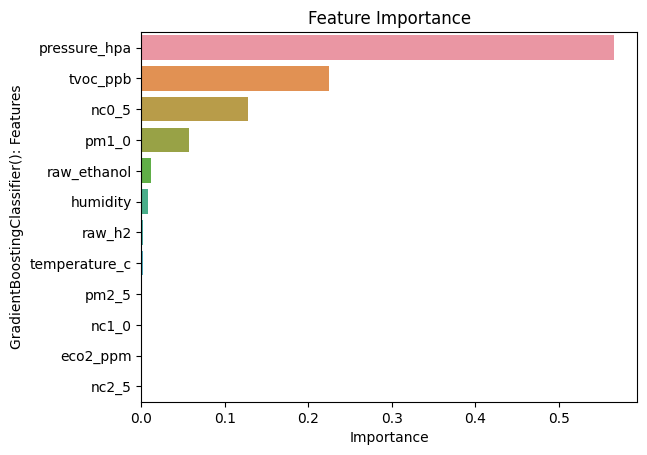

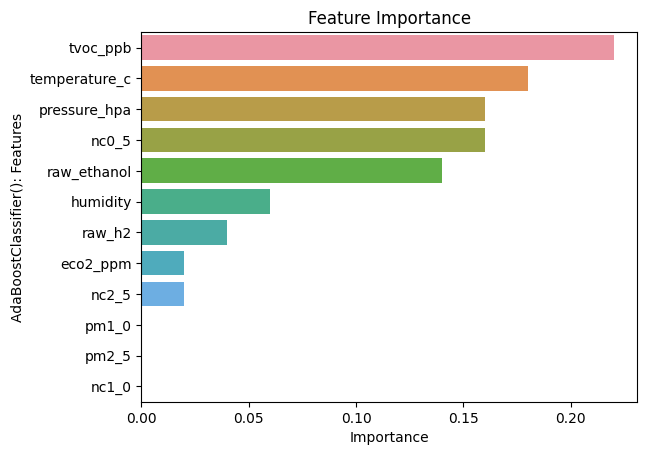

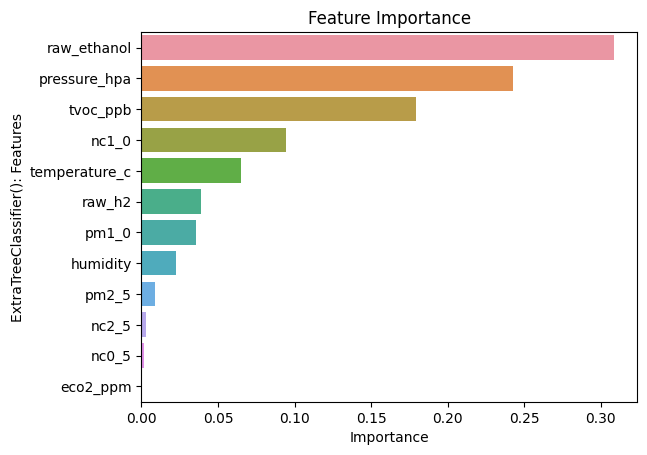

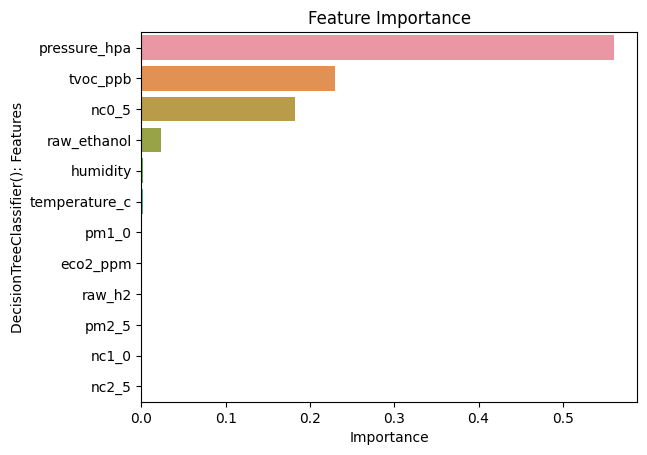

In [ ]:
# initializing to index 0 to plot feature for first model
for each_model in range(len(feature_importance)):
    plt.title('Feature Importance')
    sns.barplot(data=feature_importance[each_model], x='Importance', y = feature_importance[each_model].columns[0]);
    plt.show()

Conclusion 
So far we have been able to perform EDA on the Smoke Dataset. There was no missing so no much of cleaning done. we droped 3 columns that are not neccessary for prediction ('column_a', 'utc' and 'cnt'). We then splited the dataset into train and test and then trained five models to make make prediction for us and finally we platted a graph for the five model to see the feature importance for each.

#Best from the rest algo

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.tree import ExtraTreeClassifier 
from sklearn.metrics import accuracy_score

In [ ]:
models = [KNeighborsClassifier(),LogisticRegression(),RandomForestClassifier(),GradientBoostingClassifier(),
         AdaBoostClassifier(),SVC(),GaussianNB(),DummyClassifier(),ExtraTreeClassifier()]

In [ ]:
X = data.copy()
X.drop('fire_alarm',axis = 1,inplace = True)
y = data['fire_alarm']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)


In [ ]:
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [ ]:
Name = []
Accuracy = []
Time_Taken = []
for model in models:
    Name.append(type(model).__name__)
    begin = time.time()
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    end = time.time()
    accuracyScore = accuracy_score(prediction,y_test)
    Accuracy.append(accuracyScore)
    Time_Taken.append(end-begin)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
Dict = {'Name':Name,'Accuracy':Accuracy,'Time Taken':Time_Taken}
model_df = pd.DataFrame(Dict)
model_df

Name  Accuracy  Time Taken
0        KNeighborsClassifier  0.999441    1.438838
1          LogisticRegression  0.989222    0.493939
2      RandomForestClassifier  1.000000    4.987484
3  GradientBoostingClassifier  1.000000   17.464838
4          AdaBoostClassifier  0.999920    3.969565
5                         SVC  0.999281    6.611750
6                  GaussianNB  0.825962    0.016760
7             DummyClassifier  0.712199    0.002132
8         ExtraTreeClassifier  0.999681    0.020339

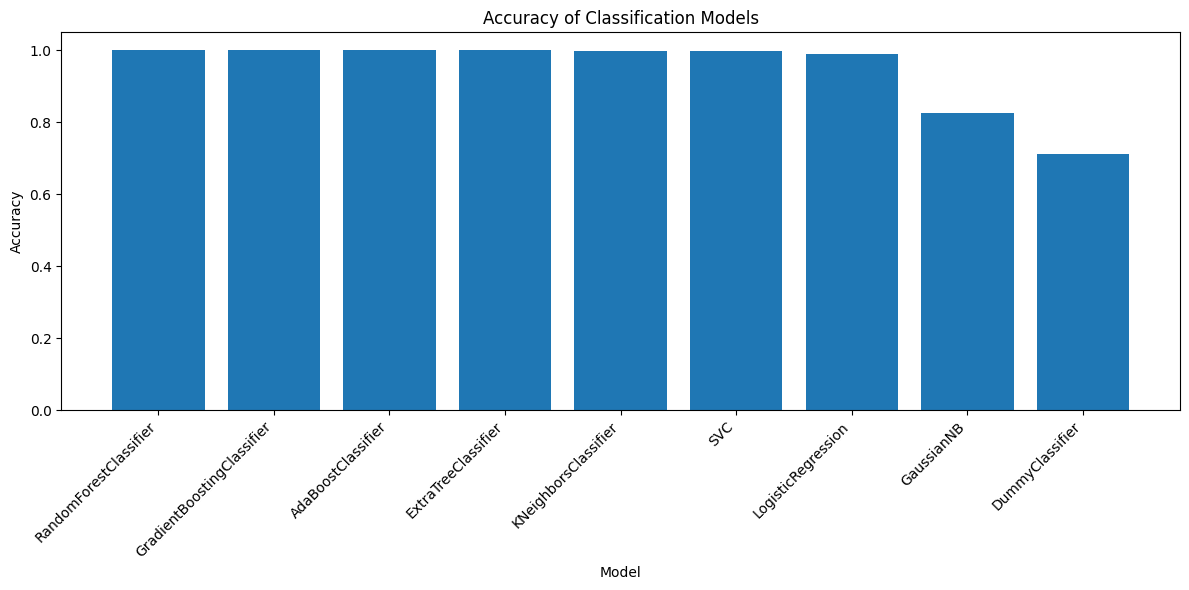

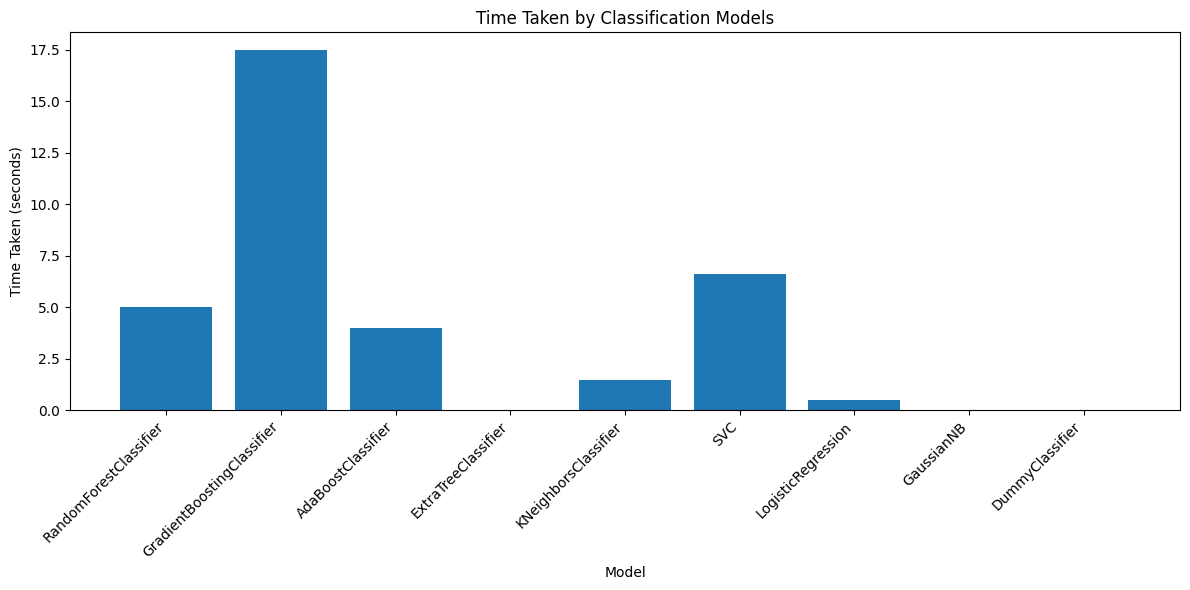

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the data as a pandas dataframe
data = {'Name': ['KNeighborsClassifier', 'LogisticRegression', 'RandomForestClassifier',
                 'GradientBoostingClassifier', 'AdaBoostClassifier', 'SVC', 'GaussianNB',
                 'DummyClassifier', 'ExtraTreeClassifier'],
        'Accuracy': [0.999441, 0.989222, 1.000000, 1.000000, 0.999920, 0.999281, 0.825962,
                     0.712199, 0.999681],
        'Time Taken': [1.438838, 0.493939, 4.987484, 17.464838, 3.969565, 6.611750, 0.016760,
                       0.002132, 0.020339]}

df = pd.DataFrame(data)

# Sort the dataframe by accuracy in descending order
df = df.sort_values(by=['Accuracy'], ascending=False)

# Create a bar chart for the accuracy of each model
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(df['Name'], df['Accuracy'])
ax.set_title('Accuracy of Classification Models')
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Create a bar chart for the time taken by each model
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(df['Name'], df['Time Taken'])
ax.set_title('Time Taken by Classification Models')
ax.set_xlabel('Model')
ax.set_ylabel('Time Taken (seconds)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


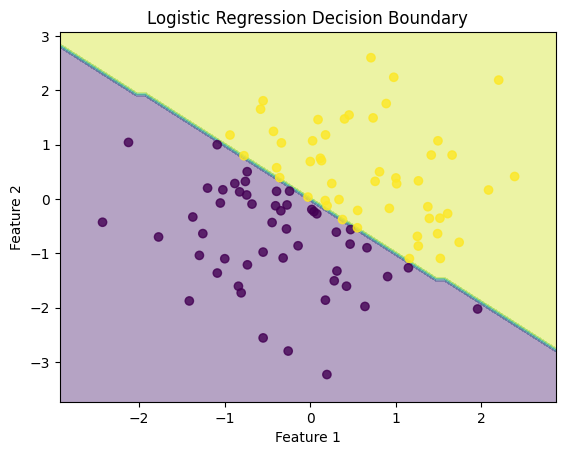

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Generate some random data
np.random.seed(123)
X = np.random.randn(100, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)

# Create the logistic regression model
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

# Fit the model to the data
logreg.fit(X, y)

# Create a meshgrid to plot the decision boundary
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the class of each point on the meshgrid
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()


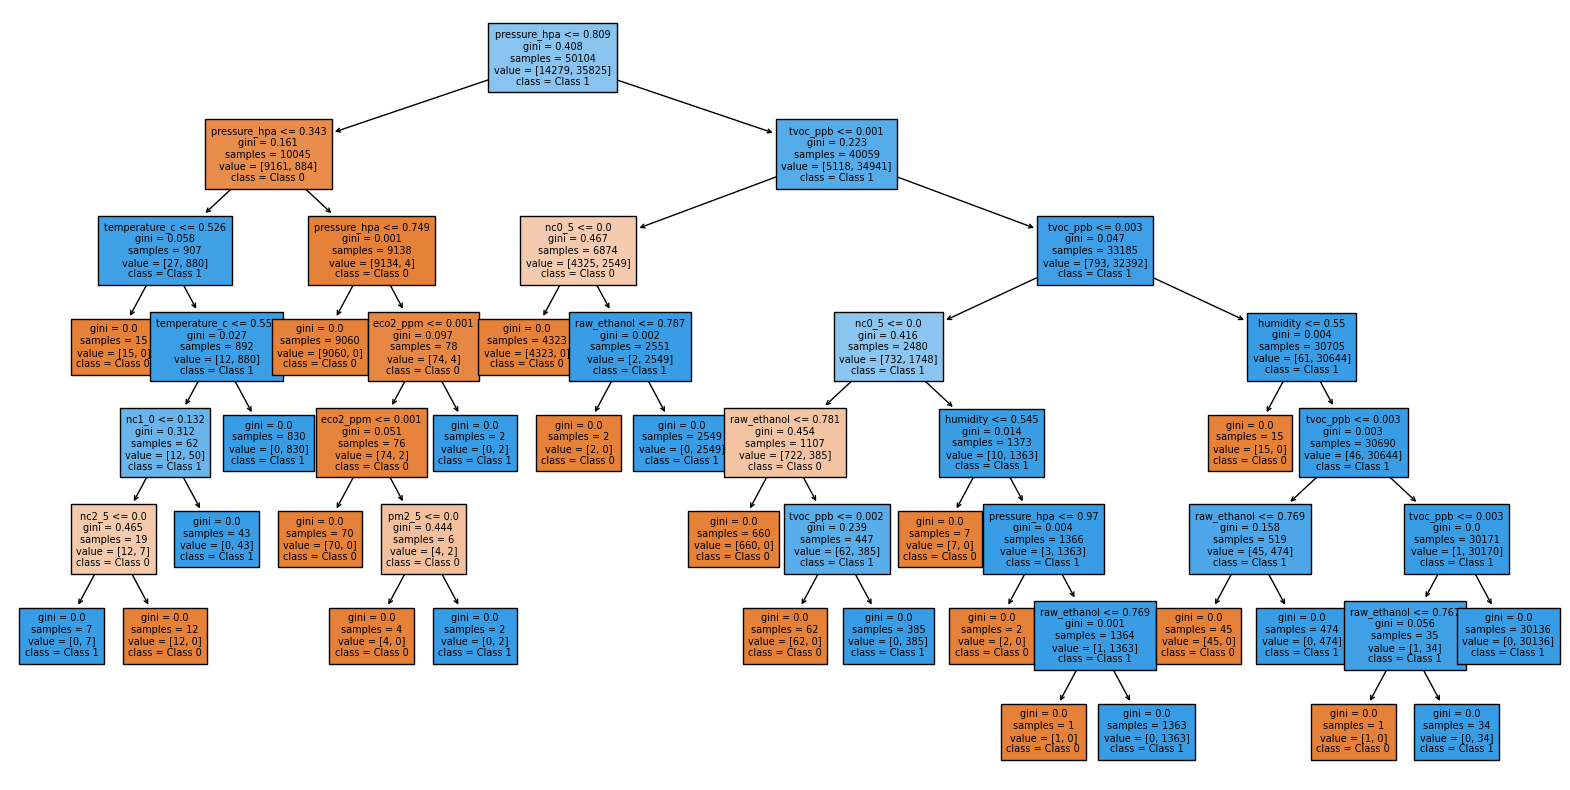

In [ ]:

# Create the decision tree model
dt_model = DecisionTreeClassifier()

# Fit the model to the data
dt_model.fit(X_train, y_train)

# Visualize the decision tree
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(dt_model, ax=ax, feature_names=input_cols, fontsize=7, filled=True, class_names=['Class 0', 'Class 1'])
plt.show()


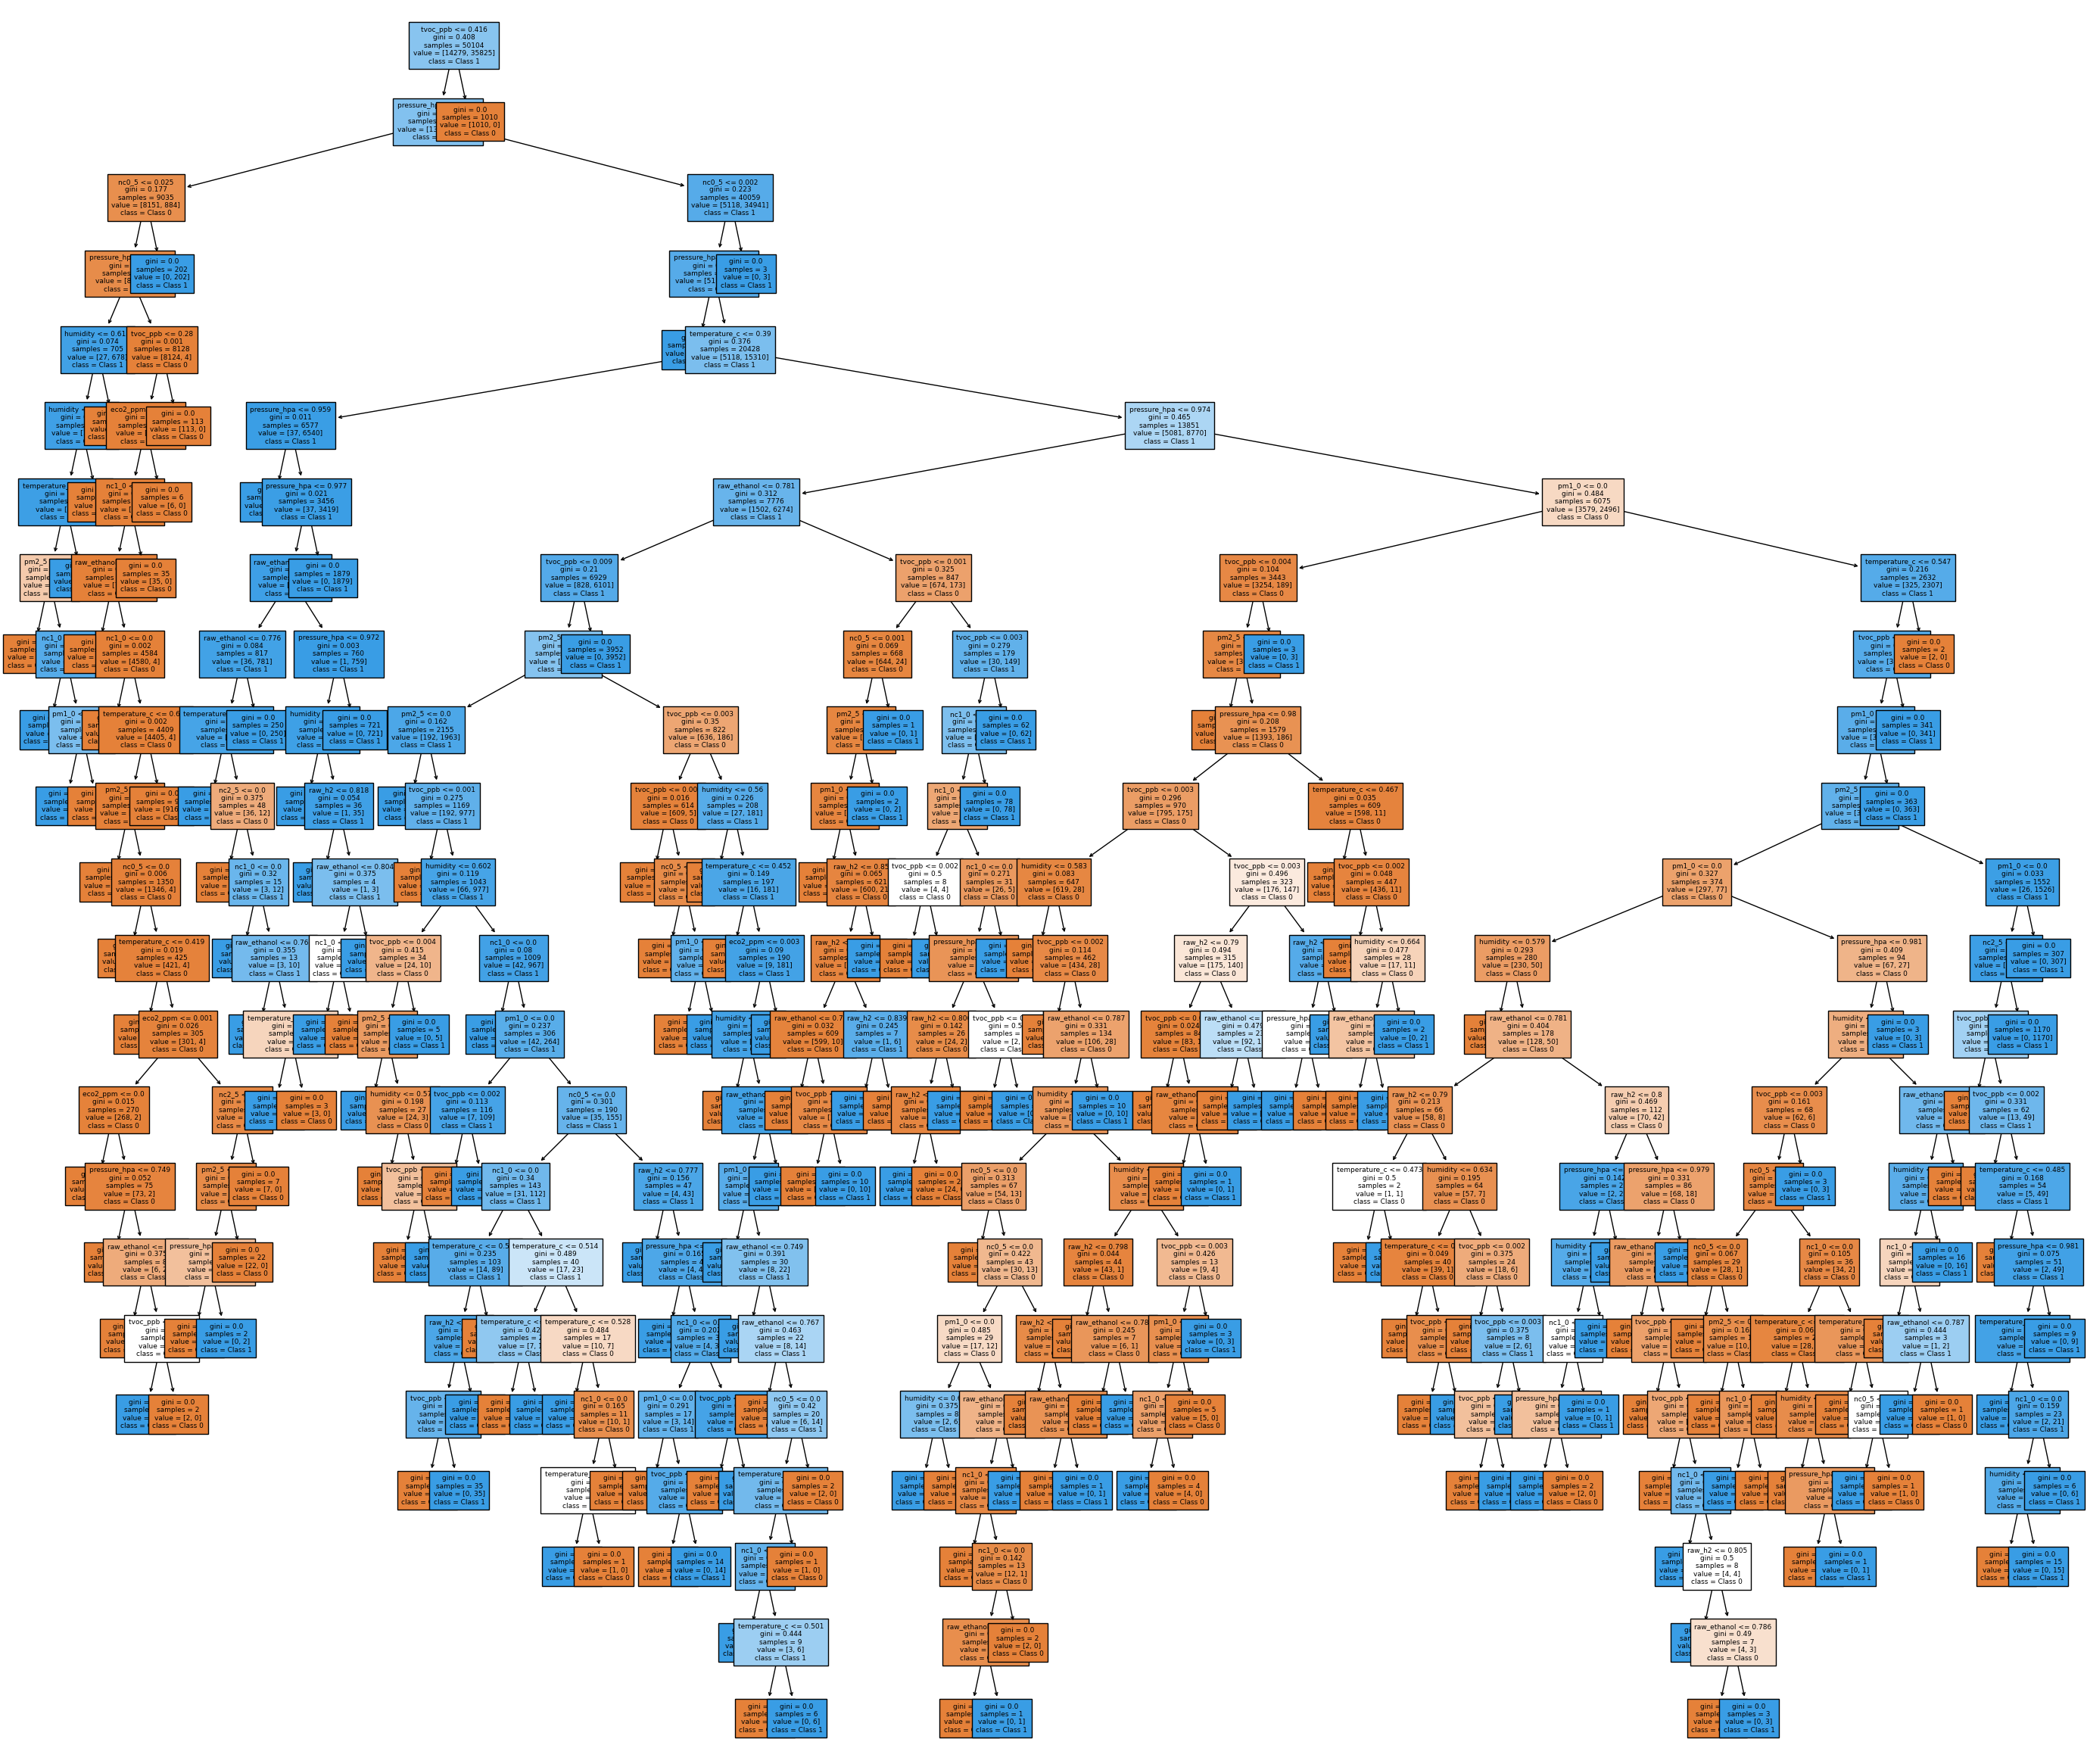

In [ ]:

# Create the decision tree model
dt_model =ExtraTreeClassifier()

# Fit the model to the data
dt_model.fit(X_train, y_train)

# Visualize the decision tree with larger font size and two colors
fig, ax = plt.subplots(figsize=(35, 30))
plot_tree(dt_model, ax=ax, feature_names=input_cols, fontsize=6.5,filled=True, class_names=['Class 0', 'Class 1'])
plt.show()


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



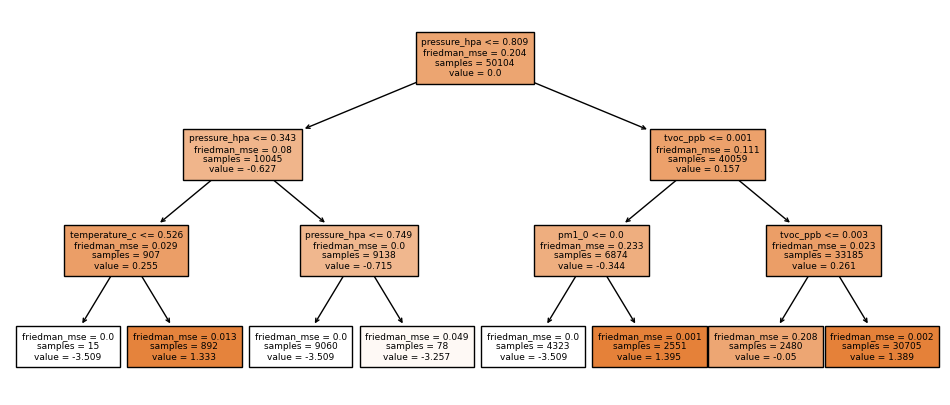

In [ ]:

# Create a gradient boosting classifier
gb_model = GradientBoostingClassifier()

# Fit the model to the data
gb_model.fit(X_train, y_train)

# Extract a decision tree from the gradient boosting classifier
dt_model = gb_model.estimators_[0, 0]

# Visualize the decision tree with adjusted plot size and font size
fig, ax = plt.subplots(figsize=(12, 5))
plot_tree(dt_model, ax=ax, feature_names=input_cols, fontsize=6.5,filled=True, class_names=['Class 0', 'Class 1'])
plt.show()
